# <font color = blue>Housing Price Prediction using Linear, Ridge and Lasso Regression<font>

#### <font color = blue>   Neha Purohit <font>
    

### 1. Data Exploration

In [1]:
#import all required Python libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualize data 
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Linear, Ridge and Lasso 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)
pd.set_option('precision',2)

In [2]:
#importing dataset to csv

h_p= pd.read_csv('train.csv')
h_p.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
h_p.shape

(1460, 81)

In [5]:
#Checking the Metadata 

h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Describe the data 
h_p.describe([0.25,0.50,0.75,0.90,0.99])

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count  1460.00      1460.0      1201.00    1460.00      1460.00      1460.00   
mean    730.50        56.9        70.05   10516.83         6.10         5.58   
std     421.61        42.3        24.28    9981.26         1.38         1.11   
min       1.00        20.0        21.00    1300.00         1.00         1.00   
25%     365.75        20.0        59.00    7553.50         5.00         5.00   
50%     730.50        50.0        69.00    9478.50         6.00         5.00   
75%    1095.25        70.0        80.00   11601.50         7.00         6.00   
90%    1314.10       120.0        96.00   14381.70         8.00         7.00   
99%    1445.41       190.0       141.00   37567.64        10.00         9.00   
max    1460.00       190.0       313.00  215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1452.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.69      443.64       46.55     567.24   
std        30.20         20.65      181.07      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      166.00      712.25        0.00     808.00   
90%      2006.00       2006.00      335.00     1065.50      117.20    1232.00   
99%      2009.00       2009.00      791.92     1572.41      830.38    1797.05   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
90%        1602.20   1680.00    954.20          0.00    2158.30          1.00   
99%        2155.05   2219.46   1418.92        360.00    3123.48          2.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
90%            0.00      2.00      1.00          4.00          1.00   
99%            1.00      3.00      1.00          5.00          2.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1379.00     1460.00     1460.00   
mean           6.52        0.61      1978.51        1.77      472.98   
std            1.63        0.64        24.69        0.75      213.80   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1961.00        1.00      334.50   
50%            6.00        1.00      1980.00        2.00      480.00   
75%            7.00        1.00      2002.00        2.00     

## 2. Data cleaning and Visualization
 

In [11]:
#Checking the percentage of null values 

round(100*h_p.isnull().sum()/len(h_p.index),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

#### From above, 80% missing values is actually meangiful , can be in the model building, so dropping these 
- "PoolQC": Pool quality
- "MiscFeature": Miscellaneous feature not covered in other categories
- "Alley": Type of alley access to property
- "Fence": Fence quality
- "Id": index column

In [14]:
h_p = h_p.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id'],axis='columns')

In [15]:
h_p.shape

(1460, 76)

In [16]:
#Checking the percentage of null values again in each column

round(100*h_p.isnull().sum()/len(h_p.index),2).sort_values(ascending=False)

FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
YearBuilt         0.00
Exterior2nd       0.00
Exterior1st       0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
RoofMatl          0.00
RoofStyle         0.00
YearRemodAdd      0.00
SalePrice         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
BsmtFinSF1        0.00
Heating           0.00
BsmtFinSF2        0.00
EnclosedPor

`We could see ther are many missing values in some of the column which may contribute our analysis, so instead we replace with other values to segregate the items`

In [29]:
#Fireplace
h_p.loc[h_p['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'
#Basement
h_p.loc[h_p['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
h_p.loc[h_p['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
h_p.loc[h_p['BsmtExposure'].isnull(),['BsmtExposure']] = 'No Basement'
h_p.loc[h_p['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
h_p.loc[h_p['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'
#MasVnrType
h_p.loc[h_p['MasVnrType'].isnull(),['MasVnrType']] = 'none'
h_p.loc[h_p['MasVnrArea'].isnull(),['MasVnrArea']] = 0
#Garage
h_p.loc[h_p['GarageType'].isnull(),['GarageType']] = 'No Garage'
h_p.loc[h_p['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
h_p.loc[h_p['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
h_p.loc[h_p['GarageCond'].isnull(),['GarageCond']] = 'No Garage'
#Electrical
h_p.loc[h_p['Electrical'].isnull(),['Electrical']] = "SBrkr"

In [19]:
#Checking the percentage of null values in each column

round(100*h_p.isnull().sum()/len(h_p.index),2).sort_values(ascending=False)

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
SalePrice         0.00
Foundation        0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
ExterCond         0.00
BsmtQual          0.00
RoofStyle         0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
RoofMatl          0.00
YearBuilt         0.00
YearRemodAdd      0.00
TotalBsmtSF       0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
BsmtUnfSF         0.00
Heating           0.00
SaleCondition     0.00
HeatingQC         0.00
GarageCars        0.00
GarageArea 

#### Analysis on these 5 variable to see what best fits

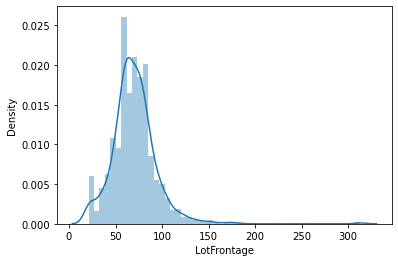

In [24]:
# LotFrontage : 
sns.distplot(h_p.LotFrontage)
plt.show()

In [25]:
h_p.LotFrontage.fillna(h_p.LotFrontage.median(),inplace=True)

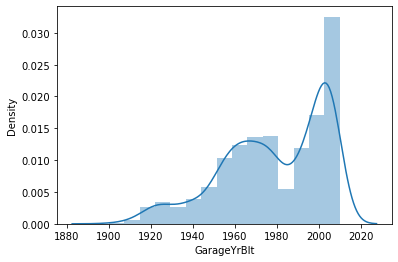

In [26]:
# GarageYrBlt: Year garage was built
sns.distplot(h_p.GarageYrBlt)
plt.show()

In [27]:
h_p.GarageYrBlt.fillna(h_p.GarageYrBlt.median(),inplace=True)

In [32]:
#Checking the percentage of null values in each column

round(100*h_p.isnull().sum()/len(h_p.index),2).sort_values(ascending=False)

#Below result shows we have no more data to be corrected.

SalePrice        0.0
Foundation       0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
BsmtQual         0.0
SaleCondition    0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
RoofStyle        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

In [31]:
h_p.shape

(1460, 76)

#### Creating a new column HouseOld of building and dropping the other columns.


In [33]:
h_p['HouseOld'] = h_p['YrSold'] - h_p['YearRemodAdd']
h_p['HouseOld'].head()

0     5
1    31
2     6
3    36
4     8
Name: HouseOld, dtype: int64

In [34]:
h_p.shape

(1460, 77)

In [35]:
# Dropping below 4 variable as these are of no use anymore
h_p = h_p.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'],axis='columns')

In [36]:
h_p.shape

(1460, 73)

In [37]:
## Checking collinearity after normalizing the data:

n_normalize_cols = {}
for col in h_p.columns:
    max_val = max(list(h_p[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))
    if max_val >= 0.85:
        n_normalize_cols[col] = round(max_val,2)
        
pd.DataFrame({'Features': list(n_normalize_cols.keys()), 'Percentage': list(n_normalize_cols.values())})

Features  Percentage
0          Street        1.00
1     LandContour        0.90
2       Utilities        1.00
3       LandSlope        0.95
4      Condition1        0.86
5      Condition2        0.99
6        RoofMatl        0.98
7       ExterCond        0.88
8        BsmtCond        0.90
9    BsmtFinType2        0.86
10     BsmtFinSF2        0.89
11        Heating        0.98
12     CentralAir        0.93
13     Electrical        0.91
14   LowQualFinSF        0.98
15   BsmtHalfBath        0.94
16   KitchenAbvGr        0.95
17     Functional        0.93
18     GarageQual        0.90
19     GarageCond        0.91
20     PavedDrive        0.92
21  EnclosedPorch        0.86
22      3SsnPorch        0.98
23    ScreenPorch        0.92
24       PoolArea        1.00
25        MiscVal        0.96
26       SaleType        0.87

In [38]:
# these are highly correlated and henceforth straightway can be dropped from the analysis
h_p = h_p.drop(n_normalize_cols.keys(), axis=1)

In [39]:
h_p.shape

(1460, 46)

In [40]:
# Calculating Inter-Quartile Range for outliers:

n_f = h_p.select_dtypes(['int64','float64']).columns

h_p_n = h_p

#Calculate for n_f variables
for k in n_f:
    IQR = h_p_n[k].quantile(.75) - h_p_n[k].quantile(.25)
    h_p_n = h_p_n[(h_p_n[k] < (h_p_n[k].quantile(.75) + 1.5 * IQR)) & (h_p_n[k] > (h_p_n[k].quantile(.25) - 1.5 * IQR))]

h_p_n.shape[0]/h_p.shape[0] * 100

58.56164383561644

#### Removing outliers, which are about 58.56% may not be a wise decision

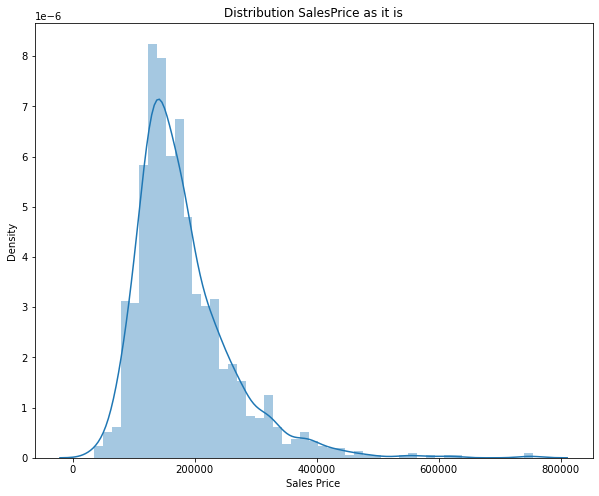

In [41]:
#plotting distribution of 'SalePrice' :
plt.figure(figsize=(10,8))
sns.distplot(h_p.SalePrice)
plt.xlabel("Sales Price")
plt.title('Distribution SalesPrice as it is')
plt.show()

`Plot is so skwed'

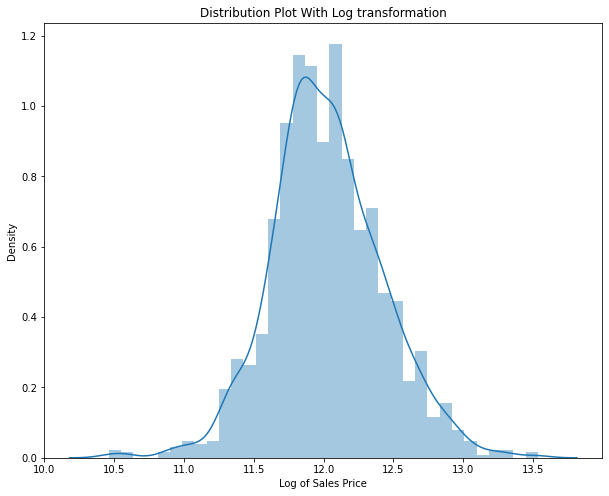

In [42]:
# SalePrice' by taking LOG 

plt.figure(figsize=(10,8))
sns.distplot(np.log(h_p.SalePrice))
plt.xlabel("Log of Sales Price")
plt.title('Distribution Plot With Log transformation')
plt.show()

`Plot is evenly distributed by log transformation of salesprice`

In [46]:
h_p['SalePrice'] = np.log(h_p.SalePrice)

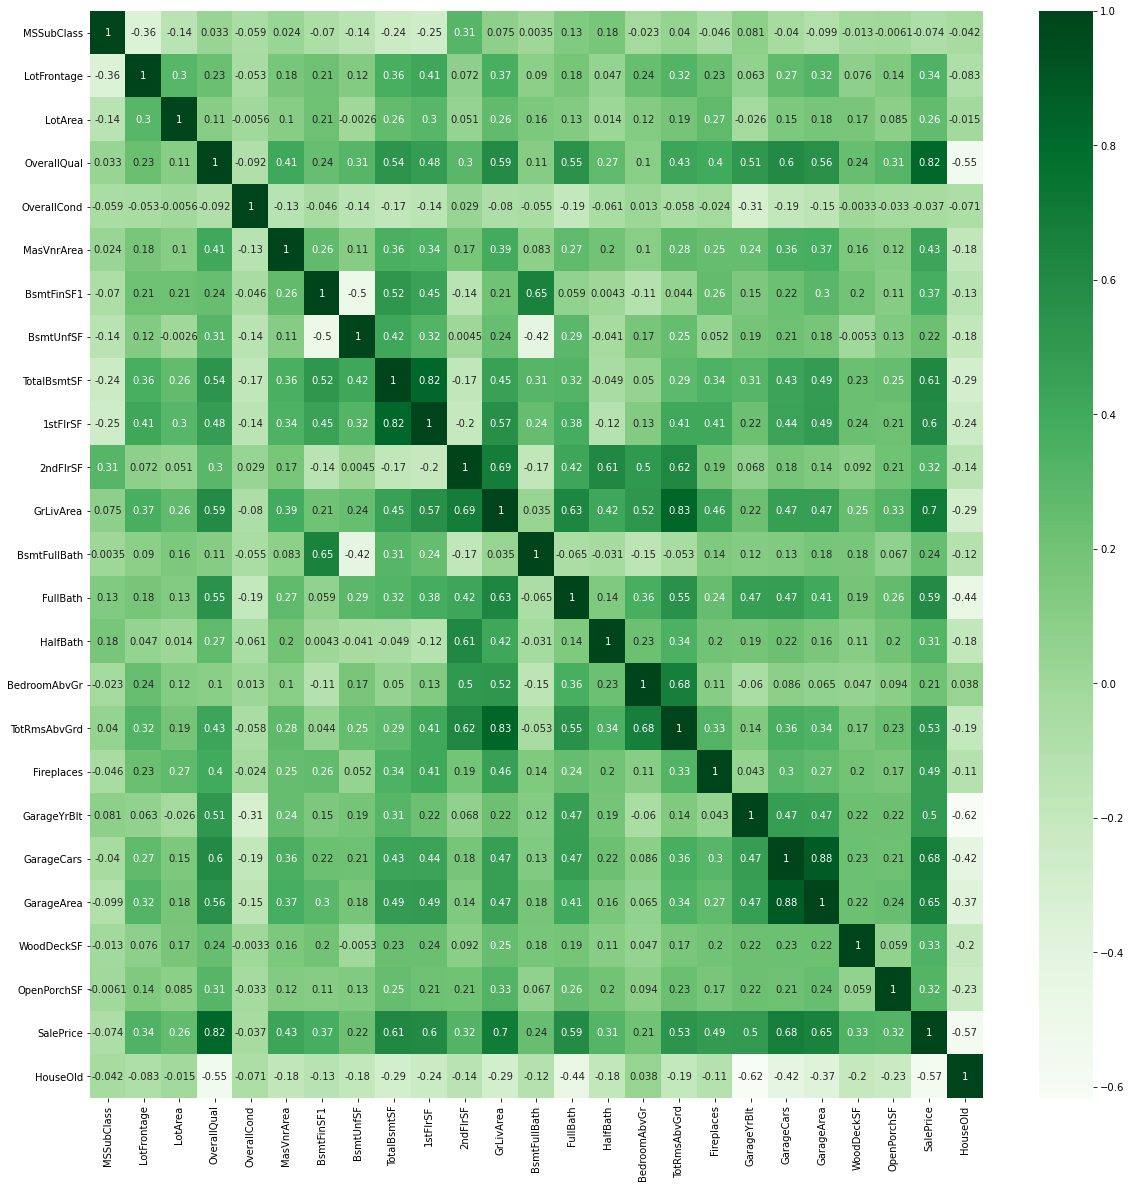

In [49]:
# Checking the correlation coefficients with the HeatMap. 
plt.figure(figsize = (20, 20))
sns.heatmap(h_p.corr(), annot = True, cmap="Greens")
plt.show()


#### Dropping these highly correlated `1stFlrSF`, `TotRmsAbvGrd` and `GarageArea`.

In [51]:
h_p.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)

In [60]:
# Numerical data columns
n_f = list(h_p.select_dtypes(['int64', 'float64']))
n_f

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'HouseOld']

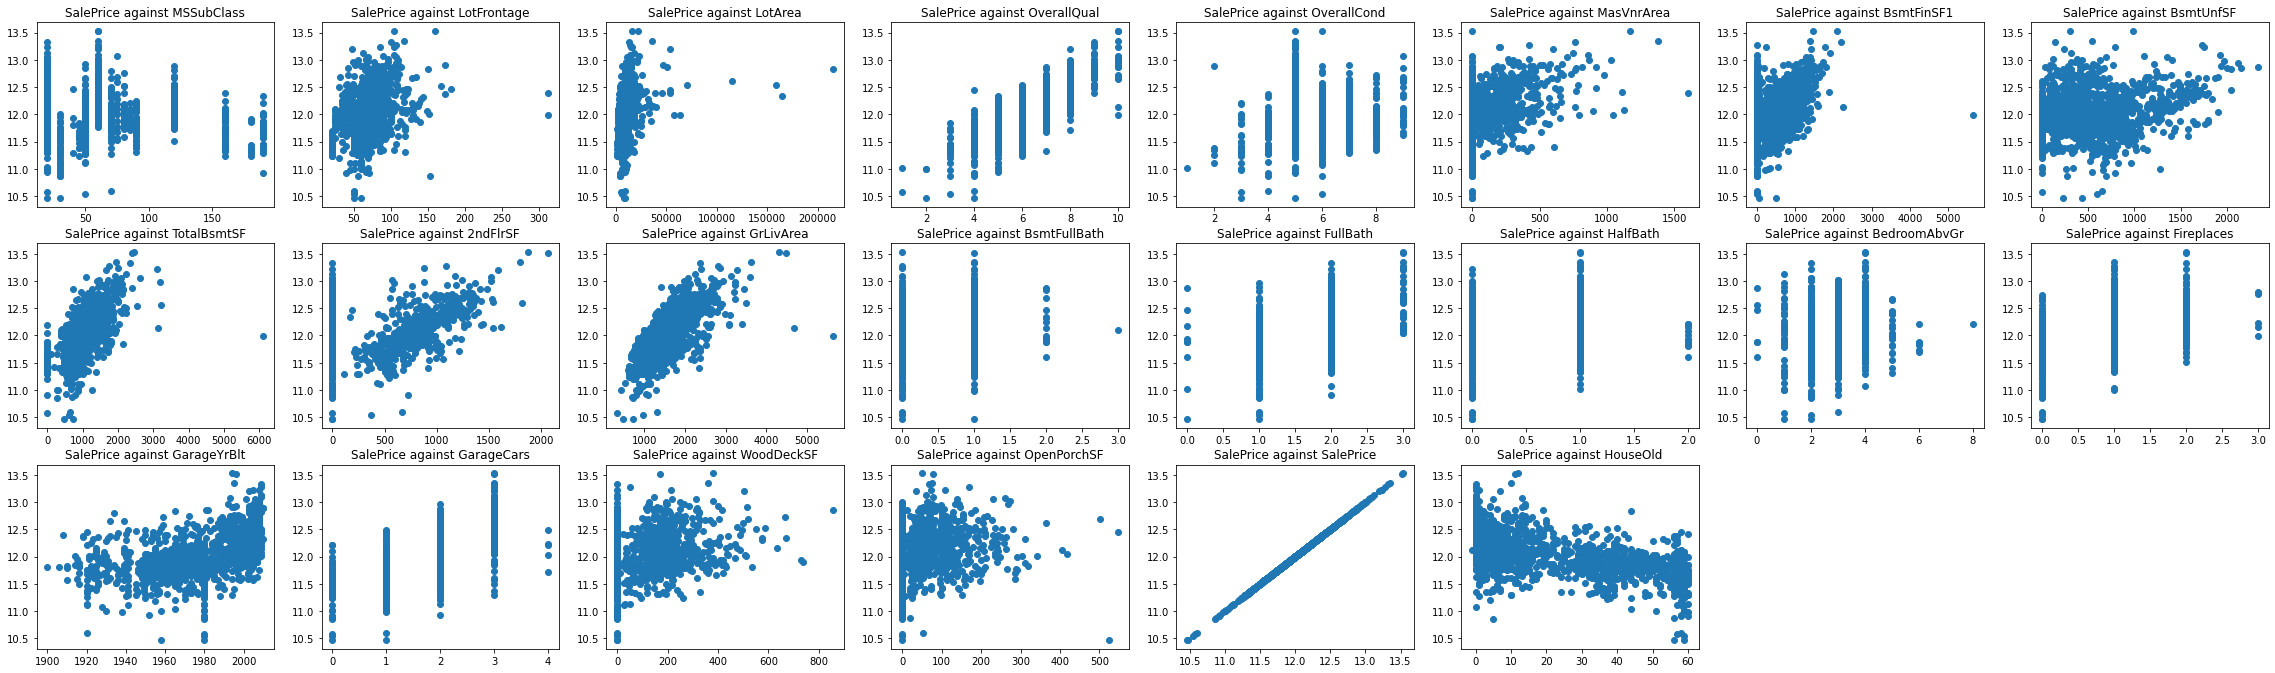

In [61]:
#Scatterplot for all the  numerical  data with target variable 'SalePrice'

plt.figure(figsize=(40,40))
for i, j in enumerate(n_f):
    plt.subplot(10,8,i+1)
    plt.scatter(h_p[j], h_p['SalePrice'])
    plt.title("SalePrice against " + j)
plt.show()

In [62]:
# Categorical data columns
c_f = list(h_p.select_dtypes('object'))
c_f

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleCondition']

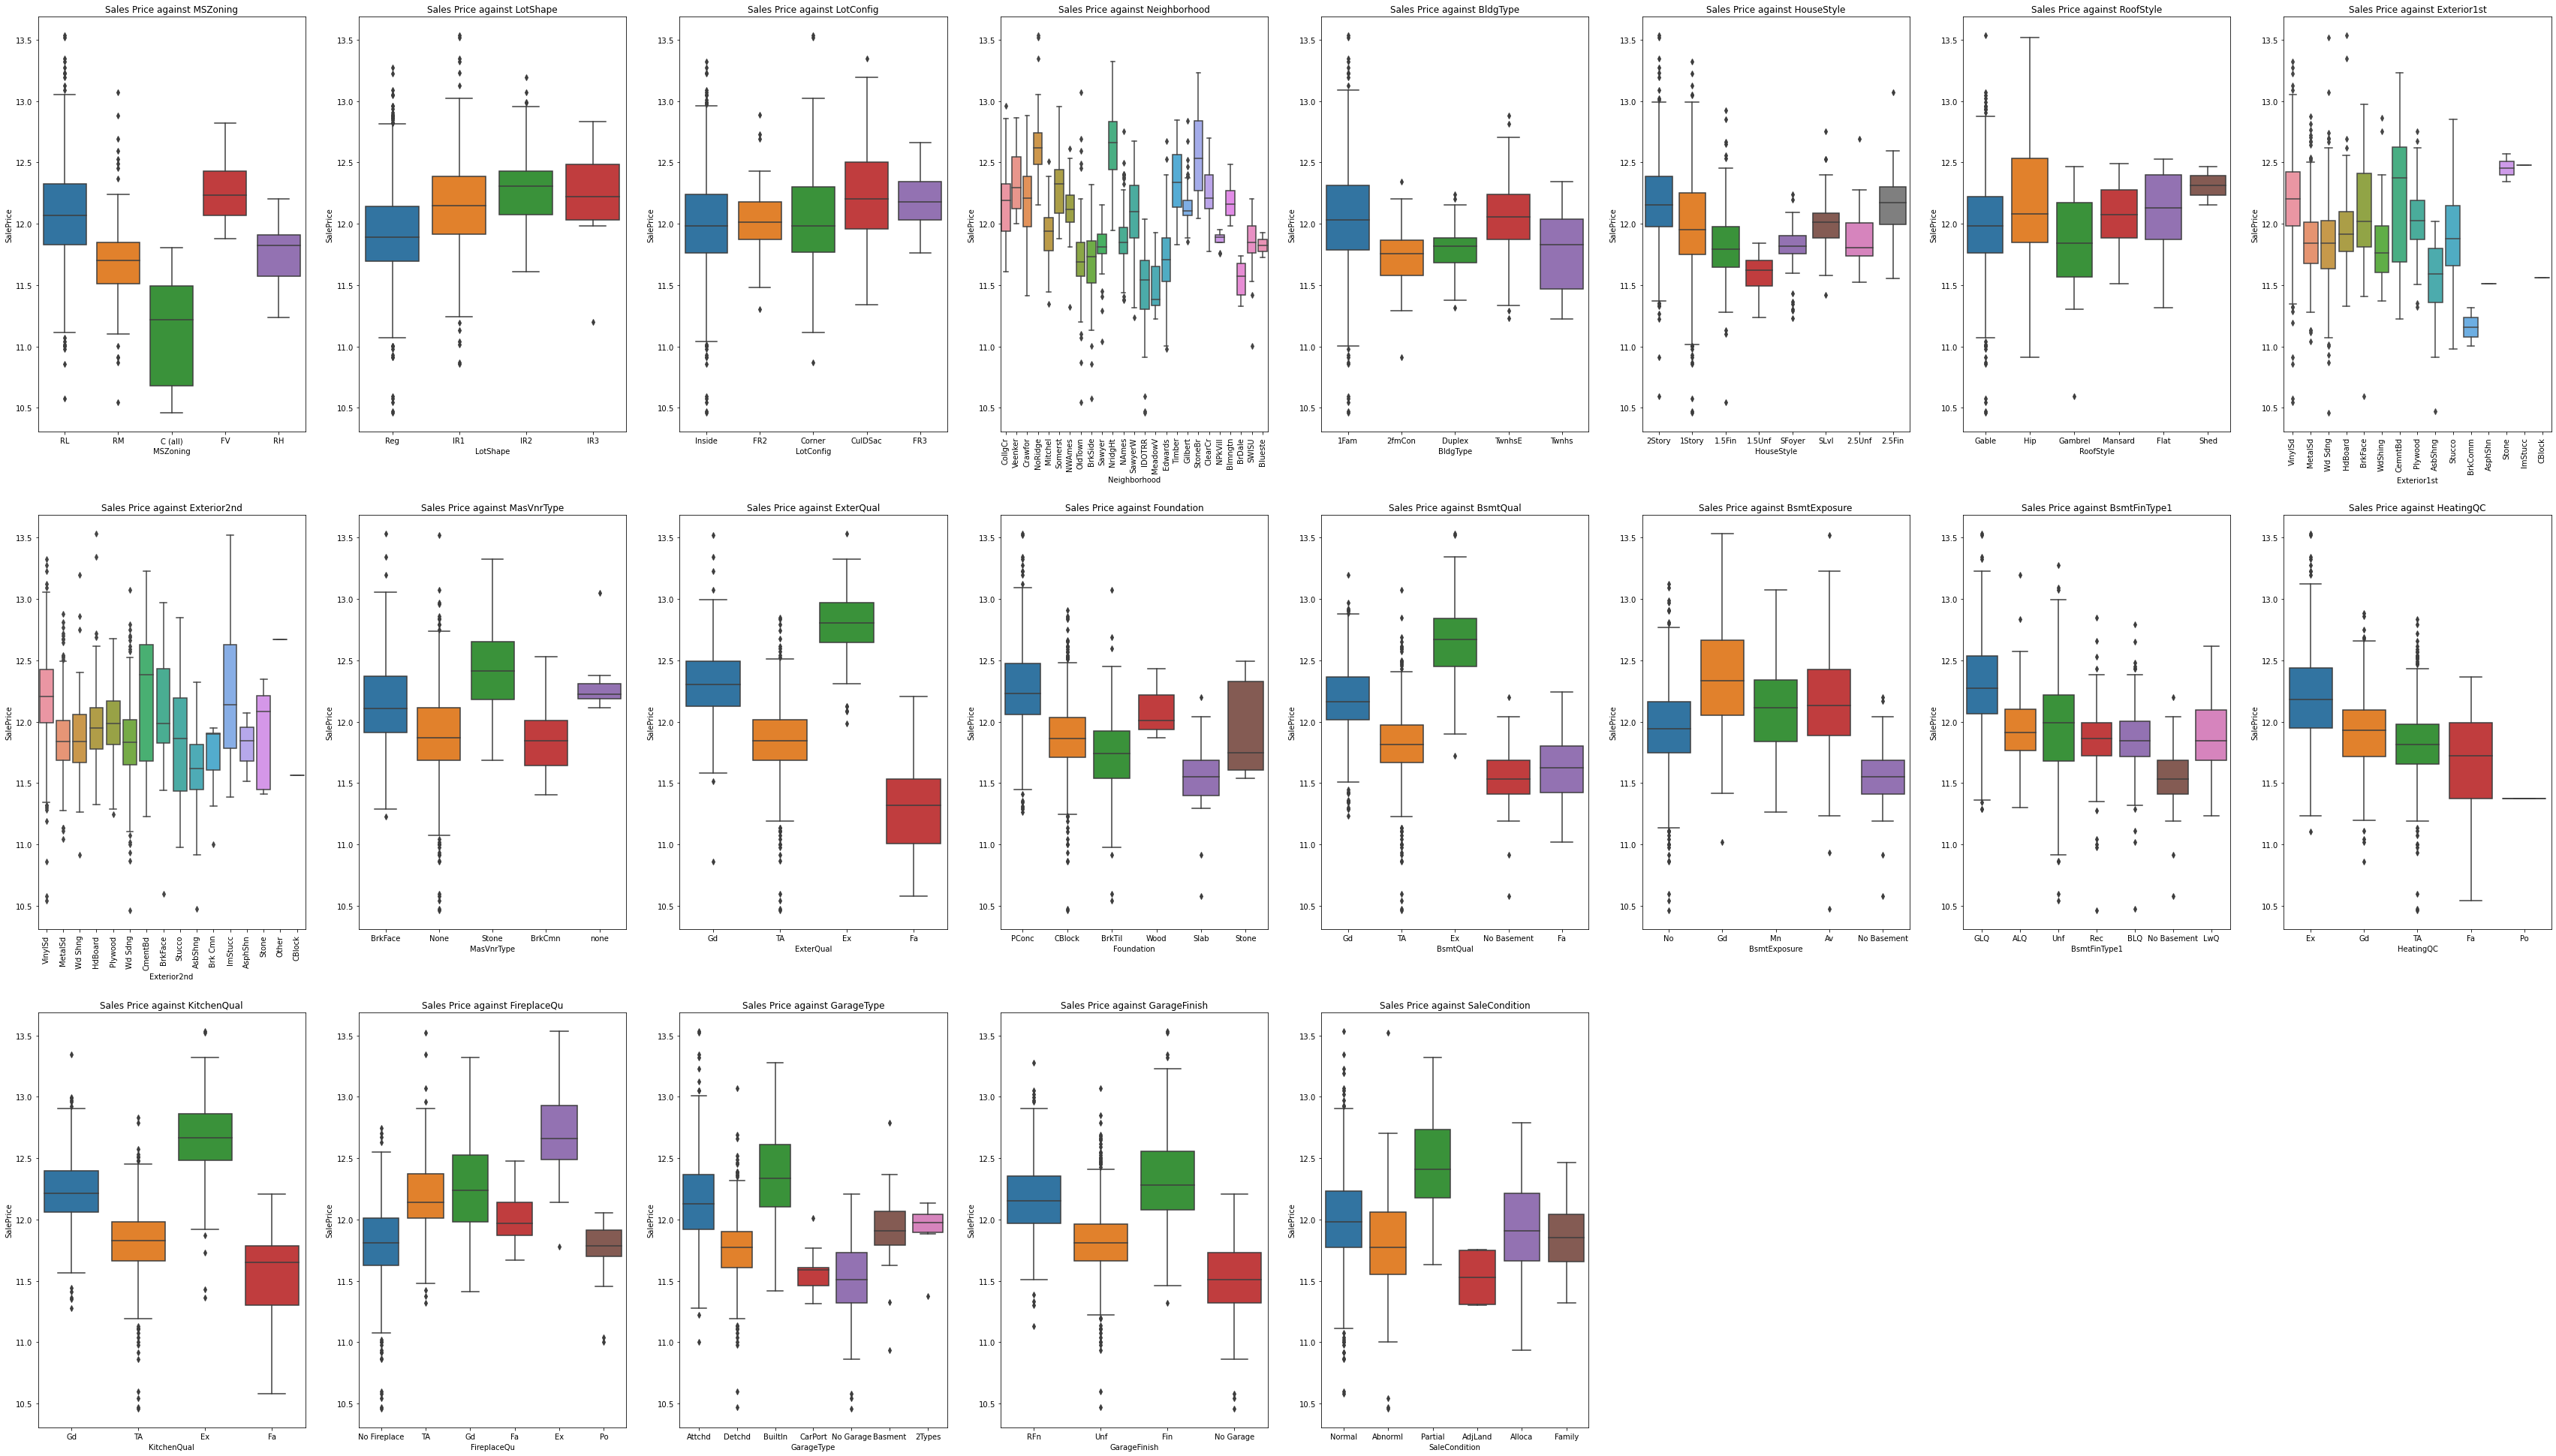

In [66]:
#Displaying the box plot
plt.figure(figsize=(60,120))
for m, n in enumerate(c_f):
    plt.subplot(10, 8, (m+1))
    sns.boxplot(x=n, y='SalePrice',data=h_p)
    plt.title("Sales Price against " + n)
    if n == "Neighborhood" or n == "Exterior1st" or n == "Exterior2nd":
        plt.xticks(rotation=90)
plt.show()

## 3.Data preparation

#### For a regression line, we need numerical values only. So, convert them to 1s and 0s by using Dummy Variable.
#### First,converting ordered categorical variable into numeric type rather than converting them into dummies.

In [68]:
h_p.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'SaleCondition', 'SalePrice', 'HouseOld'],
      dtype='object')

In [104]:
print("BsmtQual")
print(h_p.BsmtQual.value_counts())
print("\n\nBsmtExposure")
print(h_p.BsmtExposure.value_counts())
print("\n\nBsmtFinType1")
print(h_p.BsmtFinType1.value_counts())
print("\n\nLotShape")
print(h_p.LotShape.value_counts())
print("\n\nExterQual")
print(h_p.ExterQual.value_counts())
print("\n\nHeatingQC")
print(h_p.HeatingQC.value_counts())
print("\n\nKitchenQual")
print(h_p.KitchenQual.value_counts())
print("\n\nFireplaceQu")
print(h_p.FireplaceQu.value_counts())
print("\n\nGarageFinish")
print(h_p.GarageFinish.value_counts())

BsmtQual
3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64


BsmtExposure
1    953
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64


BsmtFinType1
1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64


LotShape
3    925
2    484
1     41
0     10
Name: LotShape, dtype: int64


ExterQual
2    906
3    488
4     52
1     14
Name: ExterQual, dtype: int64


HeatingQC
4    741
2    428
3    241
1     49
0      1
Name: HeatingQC, dtype: int64


KitchenQual
2    735
3    586
4    100
1     39
Name: KitchenQual, dtype: int64


FireplaceQu
0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64


GarageFinish
1    605
2    422
3    352
0     81
Name: GarageFinish, dtype: int64


### Converting categorical variables to numerical values:


In [71]:
#As per the data dictionaty for LotShape, ExterQual, BsmtQual, BsmtExposure, BsmtFinType1, KitchenQual, FireplaceQu, GarageFinish
h_p['LotShape'] = h_p['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
h_p['ExterQual'] = h_p['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
h_p['BsmtQual'] = h_p['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0})
h_p['BsmtExposure'] = h_p['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})
h_p['BsmtFinType1'] = h_p['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0})
h_p['HeatingQC'] = h_p['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
h_p['KitchenQual'] = h_p['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})
h_p['FireplaceQu'] = h_p['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
h_p['GarageFinish'] = h_p['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No Garage':0})

In [73]:
h_p.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450         3    Inside      CollgCr   
1          20       RL         80.0     9600         3       FR2      Veenker   
2          60       RL         68.0    11250         2    Inside      CollgCr   
3          70       RL         60.0     9550         2    Corner      Crawfor   
4          60       RL         84.0    14260         2       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  \
0     VinylSd    BrkFace       196.0          3      PConc         4   
1     MetalSd       None         0.0          2     CBlock         4   
2     VinylSd    BrkFace       162.0          3      PConc         4   
3     Wd Shng       None         0.0          2     BrkTil         3   
4     VinylSd    BrkFace       350.0          3      PConc         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             1             6         706        150          856          4   
1             4             5         978        284         1262          4   
2             2             6         486        434          920          4   
3             1             5         216        540          756          3   
4             3             6         655        490         1145          4   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854       1710             1         2         1             3   
1         0       1262             0         2         0             3   
2       866       1786             1         2         1             3   
3       756       1717             1         1         0             3   
4      1053       2198             1         2         1             4   

   KitchenQual  Fireplaces  FireplaceQu GarageType  GarageYrBlt  GarageFinish  \
0            3           0            0     Attchd       2003.0             2   
1            2           1            3     Attchd       1976.0             2   
2            3           1            3     Attchd       2001.0             2   
3            3           1            4     Detchd       1998.0             1   
4            3           1            3     Attchd       2000.0             2   

   GarageCars  WoodDeckSF  OpenPorchSF SaleCondition  SalePrice  HouseOld  
0           2           0           61        Normal      12.25         5  
1           2         298            0        Normal      12.11        31  
2           2           0           42        Normal      12.32         6  
3           3           0           35       Abnorml      11.85        36  
4           3         192           84        Normal      12.43         8

In [82]:
# Describe the dataframe
h_p.describe()

MSSubClass  LotFrontage    LotArea  LotShape  OverallQual  OverallCond  \
count      1460.0      1460.00    1460.00   1460.00      1460.00      1460.00   
mean         56.9        69.86   10516.83      2.59         6.10         5.58   
std          42.3        22.03    9981.26      0.58         1.38         1.11   
min          20.0        21.00    1300.00      0.00         1.00         1.00   
25%          20.0        60.00    7553.50      2.00         5.00         5.00   
50%          50.0        69.00    9478.50      3.00         6.00         5.00   
75%          70.0        79.00   11601.50      3.00         7.00         6.00   
max         190.0       313.00  215245.00      3.00        10.00         9.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1460.00    1460.00   1460.00       1460.00       1460.00   
mean       103.12       2.40      3.49          1.63          3.55   
std        180.73       0.57      0.88          1.07          2.11   
min          0.00       1.00      0.00          0.00          0.00   
25%          0.00       2.00      3.00          1.00          1.00   
50%          0.00       2.00      4.00          1.00          4.00   
75%        164.25       3.00      4.00          2.00          6.00   
max       1600.00       4.00      5.00          4.00          6.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1460.00    1460.00      1460.00    1460.00   1460.00    1460.00   
mean       443.64     567.24      1057.43       3.15    346.99    1515.46   
std        456.10     441.87       438.71       0.96    436.53     525.48   
min          0.00       0.00         0.00       0.00      0.00     334.00   
25%          0.00     223.00       795.75       2.00      0.00    1129.50   
50%        383.50     477.50       991.50       4.00      0.00    1464.00   
75%        712.25     808.00      1298.25       4.00    728.00    1776.75   
max       5644.00    2336.00      6110.00       4.00   2065.00    5642.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1460.00   1460.00   1460.00       1460.00      1460.00   
mean           0.43      1.57      0.38          2.87         2.51   
std            0.52      0.55      0.50          0.82         0.66   
min            0.00      0.00      0.00          0.00         1.00   
25%            0.00      1.00      0.00          2.00         2.00   
50%            0.00      2.00      0.00          3.00         2.00   
75%            1.00      2.00      1.00          3.00         3.00   
max            3.00      3.00      2.00          8.00         4.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1460.00      1460.00      1460.00       1460.00     1460.00   
mean         0.61         1.83      1978.59          1.72        1.77   
std          0.64         1.81        24.00          0.89        0.75   
min          0.00         0.00      1900.00          0.00        0.00   
25%          0.00         0.00      1962.00          1.00        1.00   
50%          1.00         2.00      1980.00          2.00        2.00   
75%          1.00         4.00      2001.00          2.00        2.00   
max          3.00         5.00      2010.00          3.00        4.00   

       WoodDeckSF  OpenPorchSF  SalePrice  HouseOld  MSZoning_FV  MSZoning_RH  \
count     1460.00      1460.00    1460.00   1460.00      1460.00      1460.00   
mean        94.24        46.66      12.02     22.95         0.04         0.01   
std        125.34        66.26       0.40     20.64         0.21         0.10   
min          0.00         0.00      10.46     -1.00         0.00         0.00   
25%          0.00         0.00      11.78      4.00         0.00         0.00   
50%          0.00        25.00      12.00     14.00         0.00         0.00   
75%        168.00        68.00      12.27     41.00         0.00         0.00   
max        857.

In [83]:
c_f = h_p.select_dtypes('object').columns
c_f

Index([], dtype='object')

In [84]:
# Dummies for unordered categorical data.

for j in c_f:
    dummy_cdf = pd.get_dummies(h_p[j], prefix=j, drop_first=True)   
    h_p = pd.concat([h_p, dummy_cdf], axis=1)
    h_p.drop(j, axis=1, inplace=True)  

In [85]:
h_p.head()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0          60         65.0     8450         3            7            5   
1          20         80.0     9600         3            6            8   
2          60         68.0    11250         2            7            5   
3          70         60.0     9550         2            7            5   
4          60         84.0    14260         2            8            5   

   MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0       196.0          3         4             1             6         706   
1         0.0          2         4             4             5         978   
2       162.0          3         4             2             6         486   
3         0.0          2         3             1             5         216   
4       350.0          3         4             3             6         655   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  \
0        150          856          4       854       1710             1   
1        284         1262          4         0       1262             0   
2        434          920          4       866       1786             1   
3        540          756          3       756       1717             1   
4        490         1145          4      1053       2198             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
0         2         1             3            3           0            0   
1         2         0             3            2           1            3   
2         2         1             3            3           1            3   
3         1         0             3            3           1            4   
4         2         1             4            3           1            3   

   GarageYrBlt  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  SalePrice  \
0       2003.0             2           2           0           61      12.25   
1       1976.0             2           2         298            0      12.11   
2       2001.0             2           2           0           42      12.32   
3       1998.0             1           3           0           35      11.85   
4       2000.0             2           3         192           84      12.43   

   HouseOld  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0         5            0            0            1            0   
1        31            0            0            1            0   
2         6            0            0            1            0   
3        36            0            0            1            0   
4         8            0            0            1            0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   N

In [86]:
h_p.shape

(1460, 128)

In [87]:
#Describe the data of hp dataframe
h_p.describe()

MSSubClass  LotFrontage    LotArea  LotShape  OverallQual  OverallCond  \
count      1460.0      1460.00    1460.00   1460.00      1460.00      1460.00   
mean         56.9        69.86   10516.83      2.59         6.10         5.58   
std          42.3        22.03    9981.26      0.58         1.38         1.11   
min          20.0        21.00    1300.00      0.00         1.00         1.00   
25%          20.0        60.00    7553.50      2.00         5.00         5.00   
50%          50.0        69.00    9478.50      3.00         6.00         5.00   
75%          70.0        79.00   11601.50      3.00         7.00         6.00   
max         190.0       313.00  215245.00      3.00        10.00         9.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1460.00    1460.00   1460.00       1460.00       1460.00   
mean       103.12       2.40      3.49          1.63          3.55   
std        180.73       0.57      0.88          1.07          2.11   
min          0.00       1.00      0.00          0.00          0.00   
25%          0.00       2.00      3.00          1.00          1.00   
50%          0.00       2.00      4.00          1.00          4.00   
75%        164.25       3.00      4.00          2.00          6.00   
max       1600.00       4.00      5.00          4.00          6.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1460.00    1460.00      1460.00    1460.00   1460.00    1460.00   
mean       443.64     567.24      1057.43       3.15    346.99    1515.46   
std        456.10     441.87       438.71       0.96    436.53     525.48   
min          0.00       0.00         0.00       0.00      0.00     334.00   
25%          0.00     223.00       795.75       2.00      0.00    1129.50   
50%        383.50     477.50       991.50       4.00      0.00    1464.00   
75%        712.25     808.00      1298.25       4.00    728.00    1776.75   
max       5644.00    2336.00      6110.00       4.00   2065.00    5642.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1460.00   1460.00   1460.00       1460.00      1460.00   
mean           0.43      1.57      0.38          2.87         2.51   
std            0.52      0.55      0.50          0.82         0.66   
min            0.00      0.00      0.00          0.00         1.00   
25%            0.00      1.00      0.00          2.00         2.00   
50%            0.00      2.00      0.00          3.00         2.00   
75%            1.00      2.00      1.00          3.00         3.00   
max            3.00      3.00      2.00          8.00         4.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1460.00      1460.00      1460.00       1460.00     1460.00   
mean         0.61         1.83      1978.59          1.72        1.77   
std          0.64         1.81        24.00          0.89        0.75   
min          0.00         0.00      1900.00          0.00        0.00   
25%          0.00         0.00      1962.00          1.00        1.00   
50%          1.00         2.00      1980.00          2.00        2.00   
75%          1.00         4.00      2001.00          2.00        2.00   
max          3.00         5.00      2010.00          3.00        4.00   

       WoodDeckSF  OpenPorchSF  SalePrice  HouseOld  MSZoning_FV  MSZoning_RH  \
count     1460.00      1460.00    1460.00   1460.00      1460.00      1460.00   
mean        94.24        46.66      12.02     22.95         0.04         0.01   
std        125.34        66.26       0.40     20.64         0.21         0.10   
min          0.00         0.00      10.46     -1.00         0.00         0.00   
25%          0.00         0.00      11.78      4.00         0.00         0.00   
50%          0.00        25.00      12.00     14.00         0.00         0.00   
75%        168.00        68.00      12.27     41.00         0.00         0.00   
max        857.

In [88]:
#train-test split.
np.random.seed(0)
h_p_train, h_p_test = train_test_split(h_p, train_size = 0.7, random_state = 100)

In [89]:
h_p_train.shape

(1021, 128)

In [90]:
h_p_train.describe()

MSSubClass  LotFrontage    LotArea  LotShape  OverallQual  OverallCond  \
count     1021.00      1021.00    1021.00   1021.00      1021.00      1021.00   
mean        58.47        69.57   10489.96      2.59         6.09         5.58   
std         43.30        22.09   10308.06      0.60         1.40         1.09   
min         20.00        21.00    1477.00      0.00         1.00         1.00   
25%         20.00        60.00    7449.00      2.00         5.00         5.00   
50%         50.00        69.00    9505.00      3.00         6.00         5.00   
75%         70.00        78.00   11512.00      3.00         7.00         6.00   
max        190.00       313.00  215245.00      3.00        10.00         9.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1021.00    1021.00   1021.00       1021.00       1021.00   
mean       104.49       2.40      3.48          1.66          3.59   
std        187.34       0.57      0.90          1.09          2.11   
min          0.00       1.00      0.00          0.00          0.00   
25%          0.00       2.00      3.00          1.00          1.00   
50%          0.00       2.00      4.00          1.00          4.00   
75%        158.00       3.00      4.00          3.00          6.00   
max       1600.00       4.00      5.00          4.00          6.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1021.00    1021.00       1021.0    1021.00   1021.00    1021.00   
mean       448.17     563.75       1062.0       3.15    343.54    1518.15   
std        465.12     448.74        459.1       0.97    435.50     531.85   
min          0.00       0.00          0.0       0.00      0.00     438.00   
25%          0.00     216.00        793.0       2.00      0.00    1135.00   
50%        392.00     462.00        994.0       4.00      0.00    1466.00   
75%        712.00     806.00       1314.0       4.00    728.00    1774.00   
max       5644.00    2336.00       6110.0       4.00   2065.00    5642.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1021.00   1021.00   1021.00       1021.00      1021.00   
mean           0.44      1.57      0.38          2.86         2.51   
std            0.53      0.55      0.50          0.82         0.66   
min            0.00      0.00      0.00          0.00         1.00   
25%            0.00      1.00      0.00          2.00         2.00   
50%            0.00      2.00      0.00          3.00         2.00   
75%            1.00      2.00      1.00          3.00         3.00   
max            3.00      3.00      2.00          8.00         4.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1021.00      1021.00      1021.00       1021.00     1021.00   
mean         0.60         1.80      1978.86          1.71        1.77   
std          0.65         1.83        23.95          0.90        0.75   
min          0.00         0.00      1900.00          0.00        0.00   
25%          0.00         0.00      1963.00          1.00        1.00   
50%          1.00         2.00      1980.00          2.00        2.00   
75%          1.00         4.00      2001.00          2.00        2.00   
max          3.00         5.00      2010.00          3.00        4.00   

       WoodDeckSF  OpenPorchSF  SalePrice  HouseOld  MSZoning_FV  MSZoning_RH  \
count     1021.00      1021.00    1021.00   1021.00      1021.00      1021.00   
mean        92.64        47.04      12.02     22.83         0.04         0.01   
std        124.48        66.20       0.40     20.59         0.21         0.11   
min          0.00         0.00      10.46     -1.00         0.00         0.00   
25%          0.00         0.00      11.77      4.00         0.00         0.00   
50%          0.00        26.00      11.99     14.00         0.00         0.00   
75%        168.00        70.00      12.28     41.00         0.00         0.00   
max        857.

In [91]:
h_p_test.shape

(439, 128)

In [92]:
# Creating MinMaxScaler instance
scaler = MinMaxScaler()

In [93]:
# Applying scaler() to all the columns except for '0 or 1' and the 'dummy' variables
num_vars = h_p_train.select_dtypes(include=['int64','float64']).columns

#Fit and Transforming the Train Data
h_p_train[num_vars] = scaler.fit_transform(h_p_train[num_vars])

#Fit and Transforming the Test Data
h_p_test[num_vars] = scaler.transform(h_p_test[num_vars])

In [94]:
h_p_train.head()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
318         0.24         0.24     0.04       1.0         0.67         0.50   
239         0.18         0.11     0.03       1.0         0.56         0.38   
986         0.18         0.13     0.02       1.0         0.56         0.88   
1416        1.00         0.13     0.05       1.0         0.33         0.62   
390         0.18         0.10     0.03       1.0         0.44         0.88   

      MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
318         0.16       0.67       0.8          1.00          1.00        0.17   
239         0.00       0.33       0.6          0.25          0.33        0.02   
986         0.00       0.33       0.6          0.25          0.17        0.00   
1416        0.00       0.33       0.6          0.25          0.17        0.00   
390         0.00       0.33       0.6          0.25          0.50        0.04   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  \
318        0.15         0.22       1.00      0.62       0.42          0.33   
239        0.27         0.12       0.50      0.33       0.20          0.00   
986        0.21         0.08       0.75      0.31       0.23          0.00   
1416       0.33         0.13       0.75      0.51       0.36          0.00   
390        0.10         0.14       1.00      0.20       0.18          0.33   

      FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
318       0.67       0.5          0.50         0.67        0.33          0.6   
239       0.33       0.5          0.38         0.33        0.33          0.8   
986       0.33       0.0          0.25         0.67        0.00          0.0   
1416      0.67       0.0          0.50         0.33        0.00          0.0   
390       0.33       0.0          0.50         0.33        0.00          0.0   

      GarageYrBlt  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  \
318          0.85          0.67        0.75        0.40         0.11   
239          0.45          0.33        0.25        0.00         0.27   
986          0.45          0.33        0.25        0.46         0.00   
1416         0.65          0.33        0.50        0.00         0.00   
390          0.71          0.33        0.25        0.00         0.25   

      SalePrice  HouseOld  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
318        0.65      0.28            0            0            1            0   
239        0.38      1.00            0            0            1            0   
986        0.39      0.07            0            0            0            1   
1416       0.41      1.00            0            0            0            1   
390        0.40      0.97            0            0            1            0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
318                   0              0              0                 1   
239                   0              0              0                 1   
986                   0              0              0                 0   
1416                  0              0              0                 1   
390                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
318                      0                    0                     0   
239                      0                    0                     0   
986                      0                    0                     0   
1416                     0                    0                     0   
390                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
318                      0                     0                     0   
239                      0                     0                     0   
986                      0                     0                    

In [95]:
h_p_train.describe()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
count     1021.00      1021.00  1021.00   1021.00      1021.00      1021.00   
mean         0.23         0.17     0.04      0.86         0.57         0.57   
std          0.25         0.08     0.05      0.20         0.16         0.14   
min          0.00         0.00     0.00      0.00         0.00         0.00   
25%          0.00         0.13     0.03      0.67         0.44         0.50   
50%          0.18         0.16     0.04      1.00         0.56         0.50   
75%          0.29         0.20     0.05      1.00         0.67         0.62   
max          1.00         1.00     1.00      1.00         1.00         1.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1021.00    1021.00   1021.00       1021.00       1021.00   
mean         0.07       0.47      0.70          0.42          0.60   
std          0.12       0.19      0.18          0.27          0.35   
min          0.00       0.00      0.00          0.00          0.00   
25%          0.00       0.33      0.60          0.25          0.17   
50%          0.00       0.33      0.80          0.25          0.67   
75%          0.10       0.67      0.80          0.75          1.00   
max          1.00       1.00      1.00          1.00          1.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1021.00    1021.00      1021.00    1021.00   1021.00    1021.00   
mean         0.08       0.24         0.17       0.79      0.17       0.21   
std          0.08       0.19         0.08       0.24      0.21       0.10   
min          0.00       0.00         0.00       0.00      0.00       0.00   
25%          0.00       0.09         0.13       0.50      0.00       0.13   
50%          0.07       0.20         0.16       1.00      0.00       0.20   
75%          0.13       0.35         0.22       1.00      0.35       0.26   
max          1.00       1.00         1.00       1.00      1.00       1.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1021.00   1021.00   1021.00       1021.00      1021.00   
mean           0.15      0.52      0.19          0.36         0.50   
std            0.18      0.18      0.25          0.10         0.22   
min            0.00      0.00      0.00          0.00         0.00   
25%            0.00      0.33      0.00          0.25         0.33   
50%            0.00      0.67      0.00          0.38         0.33   
75%            0.33      0.67      0.50          0.38         0.67   
max            1.00      1.00      1.00          1.00         1.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1021.00      1021.00      1021.00       1021.00     1021.00   
mean         0.20         0.36         0.72          0.57        0.44   
std          0.22         0.37         0.22          0.30        0.19   
min          0.00         0.00         0.00          0.00        0.00   
25%          0.00         0.00         0.57          0.33        0.25   
50%          0.33         0.40         0.73          0.67        0.50   
75%          0.33         0.80         0.92          0.67        0.50   
max          1.00         1.00         1.00          1.00        1.00   

       WoodDeckSF  OpenPorchSF  SalePrice  HouseOld  MSZoning_FV  MSZoning_RH  \
count     1021.00      1021.00    1021.00   1021.00      1021.00      1021.00   
mean         0.11         0.09       0.51      0.39         0.04         0.01   
std          0.15         0.13       0.13      0.34         0.21         0.11   
min          0.00         0.00       0.00      0.00         0.00         0.00   
25%          0.00         0.00       0.43      0.08         0.00         0.00   
50%          0.00         0.05       0.50      0.25         0.00         0.00   
75%          0.20         0.13       0.59      0.69         0.00         0.00   
max          1.00         1.00   

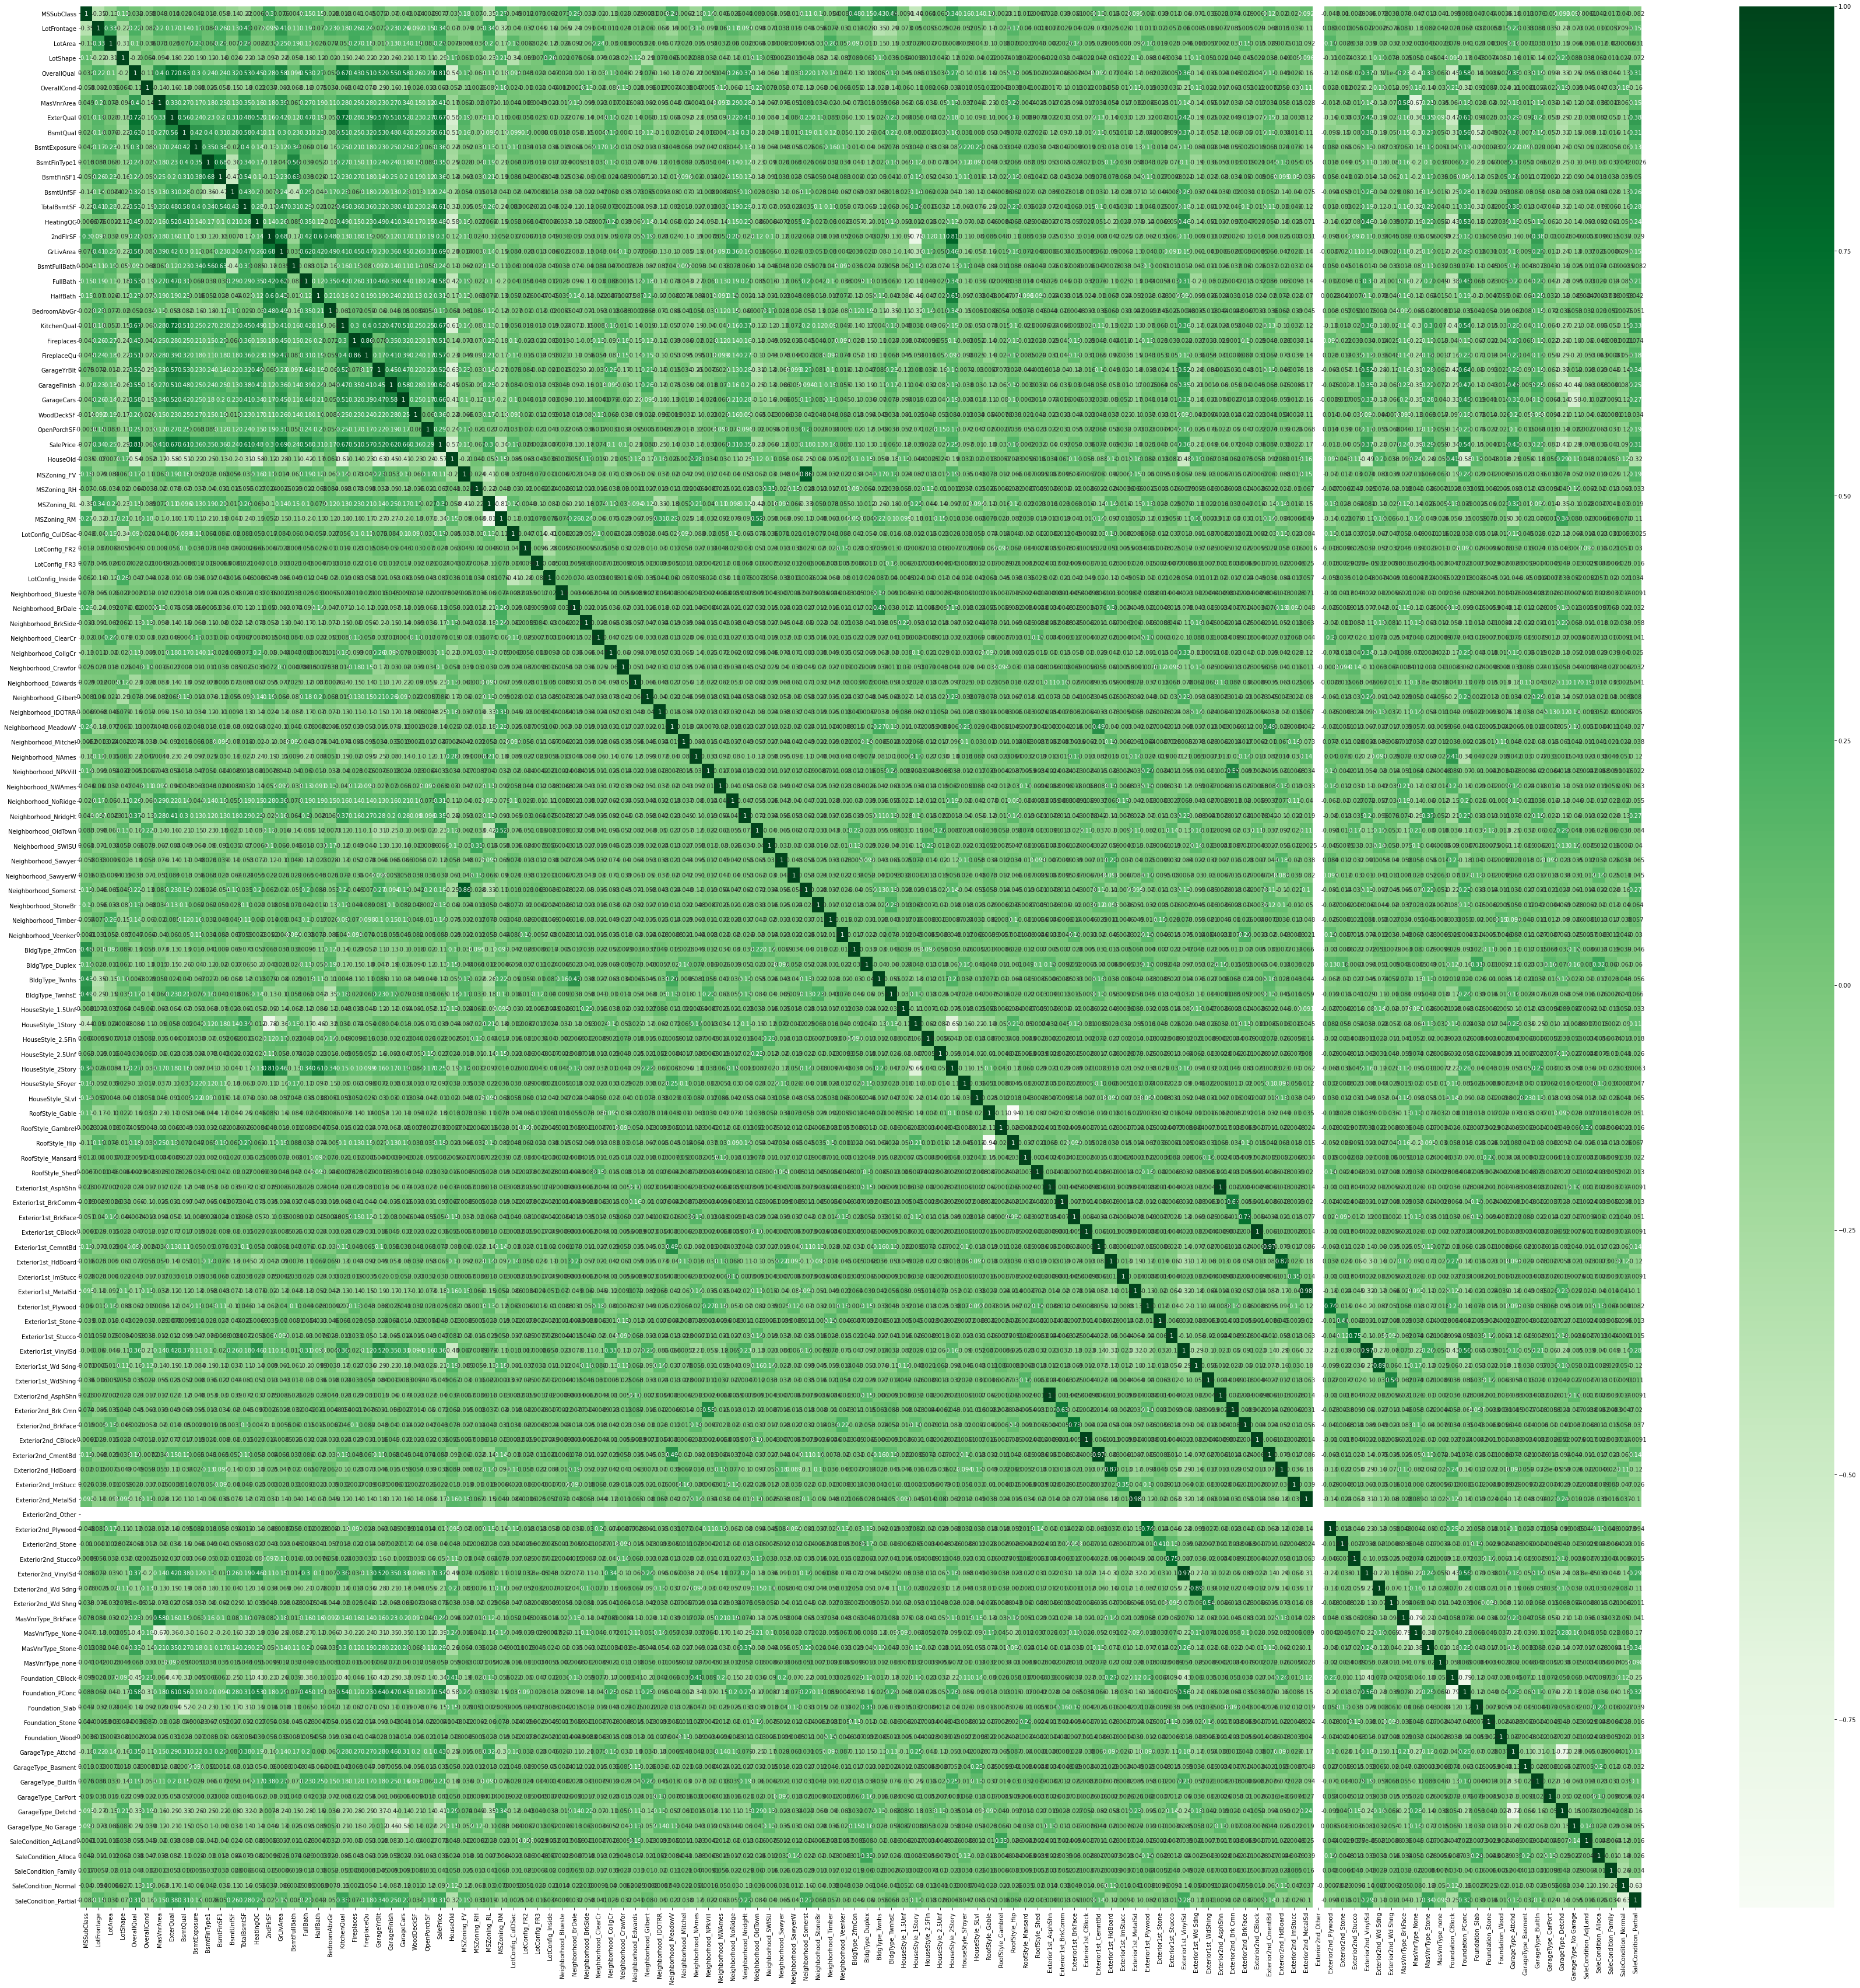

In [97]:
plt.figure(figsize = (60, 60))
sns.heatmap(h_p_train.corr(), annot = True, cmap="Greens")
plt.show()

### Choosing RFE to get best 50 features out of 127 as above is too tiny to read
### SalePrice will be used as X_train

In [99]:
#Get X and y for Train data
y_train = h_p_train.pop('SalePrice')
X_train = h_p_train

#Get X and y for Test Data
y_test = h_p_test.pop('SalePrice')
X_test = h_p_test

In [115]:
print("Shape of X_train : ", X_train.shape)


Shape of X_train :  (1021, 127)


In [116]:
print("Shape ofX_test: ", X_test.shape)


Shape ofX_test:  (439, 127)


In [117]:
print("Shape ofy_train: ", y_train.shape)


Shape ofy_train:  (1021,)


In [118]:
print("Shape ofy_test: ", y_test.shape)

Shape ofy_test:  (439,)


# 4. Model building and evaluation

#### Recursive Feature Elimination (RFE) to select best 50 variable in RFE model

In [120]:
#Creating linear Regression
h_p_lm = LinearRegression()

In [121]:
#Fitting a model
h_p_lm.fit(X_train,y_train)

#Eliminating columns using RFE in a set of 50 features. 

h_p_rfe = RFE(h_p_lm, 50)

h_p_rfe = h_p_rfe.fit(X_train,y_train)

#### Variables selected by RFE are

In [124]:
#Display RFE Columns 
temp_rfe = pd.DataFrame(list(zip(X_train.columns, h_p_rfe.support_,h_p_rfe.ranking_)), columns=['Feature', 'RFE_Support', 'RFE_Ranking']).sort_values(by='RFE_Ranking')
temp_rfe = temp_rfe.loc[temp_rfe['RFE_Ranking'] == 1]
temp_rfe.reset_index(drop=True, inplace=True)
temp_rfe

Feature  RFE_Support  RFE_Ranking
0              MSSubClass         True            1
1             MSZoning_RM         True            1
2           LotConfig_FR2         True            1
3           LotConfig_FR3         True            1
4    Neighborhood_ClearCr         True            1
5    Neighborhood_Crawfor         True            1
6    Neighborhood_Edwards         True            1
7    Neighborhood_MeadowV         True            1
8    Neighborhood_NoRidge         True            1
9    Neighborhood_NridgHt         True            1
10   Neighborhood_Somerst         True            1
11   Neighborhood_StoneBr         True            1
12   Neighborhood_Veenker         True            1
13         BldgType_Twnhs         True            1
14      HouseStyle_2.5Fin         True            1
15    Exterior1st_AsphShn         True            1
16    Exterior1st_BrkComm         True            1
17    Exterior1st_BrkFace         True            1
18     Exterior1st_CBlock         True            1
19     Exterior2nd_CBlock         True            1
20     Exterior2nd_Stucco         True            1
21    Exterior2nd_Wd Shng         True            1
22      Foundation_CBlock         True            1
23       Foundation_PConc         True            1
24        Foundation_Slab         True            1
25       Foundation_Stone         True            1
26        Foundation_Wood         True            1
27  SaleCondition_AdjLand         True            1
28            MSZoning_RL         True            1
29            MSZoning_RH         True            1
30  SaleCondition_Partial         True            1
31               HouseOld         True            1
32               FullBath         True            1
33           BsmtFullBath         True            1
34            KitchenQual         True            1
35              GrLivArea         True            1
36            OverallQual         True            1
37            FireplaceQu         True            1
38            OverallCond         True            1
39                LotArea         True            1
40            MSZoning_FV         True            1
41           BsmtFinType1         True            1
42            LotFrontage         True            1
43           GarageFinish         True            1
44             GarageCars         True            1
45           BsmtExposure         True            1
46             WoodDeckSF         True            1
47               BsmtQual         True            1
48             BsmtFinSF1         True            1
49           BedroomAbvGr         True            1

In [125]:
rfe_f = X_train.columns[h_p_rfe.support_]
rfe_f

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'WoodDeckSF', 'HouseOld',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'SaleCondition_AdjLand', 

In [127]:
# New train and test data for 50 features
X_train_new = X_train[rfe_f]
X_test_new = X_test[rfe_f]
print("X_train_new : ", X_train_new.shape)
print("X_test_new : ", X_test_new.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

X_train_new :  (1021, 50)
X_test_new :  (439, 50)
y_train :  (1021,)
y_test :  (439,)


In [128]:
#Fit new Train and find R2 score .

h_p_lm.fit(X_train_new, y_train)

LinearRegression()

In [129]:
#Displaying coefficient and intercept.
print(h_p_lm.intercept_)
print(h_p_lm.coef_)

-0.03638506147091847
[-0.04604453 -0.08394809  0.11210824  0.17848702  0.08018949  0.06002992
  0.02948945  0.02721872 -0.02222975  0.33624179  0.04987759  0.03679436
  0.05270619  0.02166962  0.02773892  0.02494395  0.0752752   0.01972459
 -0.02755827  0.14383072  0.15073598  0.15036274  0.12294488 -0.0183594
 -0.01660807  0.03628176  0.05154236 -0.02307191 -0.02559531  0.04329479
  0.05115376  0.03873934  0.04237114  0.03959197 -0.01812249 -0.02918779
  0.0237415  -0.07918461  0.02667316 -0.02046353 -0.02046353 -0.035397
 -0.03103865  0.02191949  0.02690313  0.04675529  0.05227504  0.05136136
  0.00776386  0.00935624]


In [143]:
#Function to print R2 Score, RSS, MSE and RMSE for both Train and Test Data
def calculate_score(y_train, y_train_pred, y_test, y_test_pred):
    
    score = []

    lr_r2_train = r2_score(y_train, y_train_pred)
    print('Train R2 score is : ', lr_r2_train)
    score.append(lr_r2_train)

    lr_r2_test = r2_score(y_test, y_test_pred)
    print('Test R2 score is : ', lr_r2_test)
    score.append(lr_r2_test)

    lr_rss1 = np.sum(np.square(y_train - y_train_pred))
    print('Train RSS score is: ', lr_rss1)
    score.append(lr_rss1)

    lr_rss2 = np.sum(np.square(y_test - y_test_pred))
    print('Test RSS score is: ', lr_rss2)
    score.append(lr_rss2)

    lr_mse_train = mean_squared_error(y_train, y_train_pred)
    print('Train MSE score is: ', lr_mse_train)
    score.append(lr_mse_train)

    lr_mse_test = mean_squared_error(y_test, y_test_pred)
    print('Test MSE score is: ', lr_mse_test)
    score.append(lr_mse_test)

    lr_rmse_train = lr_mse_train**0.5
    print('Train RMSE score is: ', lr_rmse_train)
    score.append(lr_rmse_train)

    lr_rmse_test = lr_mse_test**0.5
    print('Test RMSE score is: ', lr_rmse_test)
    score.append(lr_rmse_test)
    
    return score

In [144]:
y_train_pred = h_p_lm.predict(X_train_new)
y_test_pred = h_p_lm.predict(X_test_new)

print("Data without Regularization")
score1 = calculate_score(y_train, y_train_pred, y_test, y_test_pred)


Data without Regularization
Train R2 score is :  0.9025984135348283
Test R2 score is :  0.8782059737146661
Train RSS score is:  1.6535510740756627
Test RSS score is:  0.9324245061381485
Train MSE score is:  0.0016195407189771426
Test MSE score is:  0.002123973818082343
Train RMSE score is:  0.04024351772617725
Test RMSE score is:  0.046086590436724036


**`Regularization using Ridge Regression`**

In [145]:
parms = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validating
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = parms, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [146]:
# Best hyperparameter for alpha
print("Ridge Best param is: ", ridge_model_cv.best_params_)
print("Ridge Best score is: ", ridge_model_cv.best_score_)
print("Ridge Best estimator is: ", ridge_model_cv.best_estimator_)
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Ridge Best param is:  {'alpha': 1.0}
Ridge Best score is:  0.8784633670442613
Ridge Best estimator is:  Ridge()


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001              0.91             0.87               16
1        0.001              0.91             0.87               15
2         0.01              0.91             0.87               14
3         0.05              0.91             0.88               13
4          0.1              0.90             0.88               12
5          0.2              0.90             0.88               10
6          0.3              0.90             0.88                9
7          0.4              0.90             0.88                8
8          0.5              0.90             0.88                6
9          0.6              0.90             0.88                5
10         0.7              0.90             0.88                4
11         0.8              0.90             0.88                3
12         0.9              0.90             0.88                2
13           1              0.90             0.88                1
14           2              0.90             0.88                7
15           3              0.89             0.88               11
16           4              0.89             0.87               17
17           5              0.89             0.87               18
18           6              0.88             0.87               19
19           7              0.88             0.87               20
20           8              0.88             0.87               21
21           9              0.87             0.86               22
22          10              0.87             0.86               23
23          20              0.85             0.84               24
24          50              0.80             0.80               25
25         100              0.75             0.75               26
26         500              0.51             0.51               27
27        1000              0.37             0.36               28

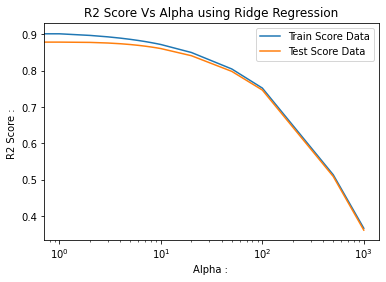

In [154]:
# Plotting mean test and train scores with alpha 

# Converting 'param_alpha' data type from object to int
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# Plotting R2 Score of Train data
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])

# Plotting R2 Score of Test data
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

plt.xlabel('Alpha : ')
plt.ylabel('R2 Score : ')
plt.title("R2 Score Vs Alpha using Ridge Regression")
plt.legend(['Train Score Data', 'Test Score Data'], loc='upper right')
plt.xscale('log')
plt.show()

### Based on above data for Ridge Regression best Alpha Value is `"1"` for processing.

In [156]:
#Fitting Ridge model with alpha = 2 , printing penalized coefficients
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[-0.03924214 -0.04448988  0.07745305  0.17960239  0.078803    0.0561459
  0.02836363  0.02421187  0.00326959  0.25718138  0.04762724  0.05044267
  0.07046165  0.02810494  0.03192133  0.02577002  0.07718906  0.02463878
 -0.02942409  0.0858296   0.09132046  0.09746464  0.069775   -0.01837477
 -0.01355359  0.03947325  0.05069967 -0.02235829 -0.02381965  0.04759119
  0.04731737  0.03933121  0.04020315  0.03755023 -0.0161365  -0.01129923
  0.0106811  -0.04925756  0.02808469 -0.01216637 -0.01216637 -0.02946095
 -0.02930722  0.01828043  0.02372457  0.03676606  0.0376751   0.0373992
  0.00456052  0.00944744]


In [157]:
y_train_pred = ridge.predict(X_train_new)
y_test_pred = ridge.predict(X_test_new)

print("Data after Ridge Regression")
score2 = calculate_score(y_train, y_train_pred, y_test, y_test_pred)


Data after Ridge Regression
Train R2 score is :  0.8998929095027461
Test R2 score is :  0.8772183558728344
Train RSS score is:  1.6994814255259973
Test RSS score is:  0.9399854605339399
Train MSE score is:  0.0016645263717198799
Test MSE score is:  0.0021411969488244645
Train RMSE score is:  0.04079860747280328
Test RMSE score is:  0.046273069368958704


### We have a good `train score` `90.05`% and  `test score`  `87.86`%. 

In [158]:
#Top 10 feature of Ridge Regression

ridge_params_df = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient':ridge.coef_})
(ridge_params_df.sort_values('Coeficient', ascending=False)).head(10)

Features  Coeficient
9      GrLivArea        0.26
3    OverallQual        0.18
21   MSZoning_RL        0.10
20   MSZoning_RH        0.09
19   MSZoning_FV        0.09
4    OverallCond        0.08
2        LotArea        0.08
16    GarageCars        0.08
12  BedroomAbvGr        0.07
22   MSZoning_RM        0.07

**`Regularization using Lasso Regression`**

In [159]:
# List of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [160]:
# Printing the best hyperparameter alpha
print("Lasso Best param is : ", lasso_model_cv.best_params_)
print("Lasso Best Score is : ", lasso_model_cv.best_score_)
print("Lasso Best estimator is : ", lasso_model_cv.best_estimator_)
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Lasso Best param is :  {'alpha': 0.0001}
Lasso Best Score is :  0.8747063946518315
Lasso Best estimator is :  Lasso(alpha=0.0001)


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001              0.90         8.75e-01                1
1        0.001              0.86         8.48e-01                2
2         0.01              0.53         5.25e-01                3
3         0.05              0.00        -6.87e-03                4
4          0.1              0.00        -6.87e-03                4
5          0.2              0.00        -6.87e-03                4
6          0.3              0.00        -6.87e-03                4
7          0.4              0.00        -6.87e-03                4
8          0.5              0.00        -6.87e-03                4
9          0.6              0.00        -6.87e-03                4
10         0.7              0.00        -6.87e-03                4
11         0.8              0.00        -6.87e-03                4
12         0.9              0.00        -6.87e-03                4
13           1              0.00        -6.87e-03                4
14           2              0.00        -6.87e-03                4
15           3              0.00        -6.87e-03                4
16           4              0.00        -6.87e-03                4
17           5              0.00        -6.87e-03                4
18           6              0.00        -6.87e-03                4
19           7              0.00        -6.87e-03                4
20           8              0.00        -6.87e-03                4
21           9              0.00        -6.87e-03                4
22          10              0.00        -6.87e-03                4
23          20              0.00        -6.87e-03                4
24          50              0.00        -6.87e-03                4
25         100              0.00        -6.87e-03                4
26         500              0.00        -6.87e-03                4
27        1000              0.00        -6.87e-03                4

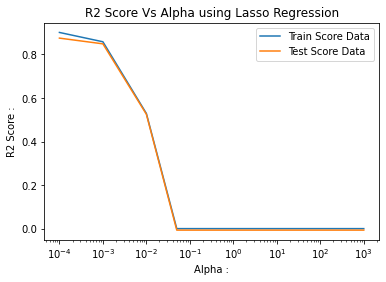

In [161]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to float
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting R2 Score of Train score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('Alpha :')
plt.ylabel('R2 Score :')
plt.title("R2 Score Vs Alpha using Lasso Regression")
plt.legend(['Train Score Data', 'Test Score Data'], loc='upper right')
plt.xscale('log')
plt.show()

### Based on above data for Lasso Regression best Alpha Value is `"0.0001"` for processing.

In [162]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [163]:
# Printing the best hyperparameter alpha
print("Lasso Best param is : ", lasso_model_cv.best_params_)
print("Lasso Best Score is : ", lasso_model_cv.best_score_)
print("Lasso Best estimator is : ", lasso_model_cv.best_estimator_)
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Lasso Best param is :  {'alpha': 0.0001}
Lasso Best Score is :  0.8747063946518315
Lasso Best estimator is :  Lasso(alpha=0.0001)


param_alpha  mean_train_score  mean_test_score  rank_test_score
0      0.0001              0.90             0.87                1
1       0.001              0.86             0.85                2
2        0.01              0.53             0.53                3

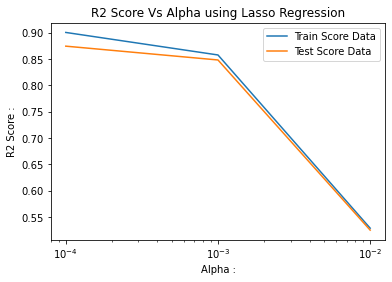

In [164]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to float
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting R2 Score of Train score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('Alpha :')
plt.ylabel('R2 Score :')
plt.title("R2 Score Vs Alpha using Lasso Regression")
plt.legend(['Train Score Data', 'Test Score Data'], loc='upper right')
plt.xscale('log')
plt.show()

In [165]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)
print(lasso.coef_)

[-0.03859222 -0.0336185   0.056533    0.19310963  0.07606738  0.04599665
  0.02770736  0.02491163  0.          0.31014376  0.04690082  0.03985392
  0.04499332  0.02305583  0.0288462   0.02394725  0.07805531  0.02017105
 -0.03044083  0.07979877  0.081308    0.09131921  0.05901403 -0.01202356
 -0.          0.03553494  0.04448834 -0.0232836  -0.00904878  0.03819731
  0.04289987  0.03585367  0.03019145  0.02871939 -0.01358673 -0.
  0.         -0.02212406  0.0270635  -0.         -0.         -0.02955517
 -0.02544837  0.01374187  0.02000649  0.02261691  0.00904287  0.
  0.          0.00856691]


In [166]:
y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Data after Lasso Regression")
score3 = calculate_score(y_train, y_train_pred, y_test, y_test_pred)

Data after Lasso Regression
Train R2 score is :  0.8982410217450232
Test R2 score is :  0.8810635212144051
Train RSS score is:  1.7275249192221906
Test RSS score is:  0.9105478394618349
Train MSE score is:  0.001691993064860128
Test MSE score is:  0.002074140864377756
Train RMSE score is:  0.04113384330281001
Test RMSE score is:  0.04554273668081175


### We have a good `train score` `89.88`% and good `test score` as well `88.20`%. 

In [167]:
#Top 10 feature of Lasso Regression

lasso_param_df = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient':lasso.coef_})
(lasso_param_df.sort_values('Coeficient', ascending=False)).head(10)

Features  Coeficient
9      GrLivArea        0.31
3    OverallQual        0.19
21   MSZoning_RL        0.09
20   MSZoning_RH        0.08
19   MSZoning_FV        0.08
16    GarageCars        0.08
4    OverallCond        0.08
22   MSZoning_RM        0.06
2        LotArea        0.06
10  BsmtFullBath        0.05

In [172]:
# Comparing all scores:

lr_table = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                        'RMSE (Train)','RMSE (Test)'], 
            'Linear Regression': score1
           }

lr_score = pd.DataFrame(lr_table ,columns = ['Metrics', 'Linear Regression'] )

rg_score = pd.Series(score2, name = 'Ridge Regression')
ls_score = pd.Series(score3, name = 'Lasso Regression')

final_score = pd.concat([lr_score, rg_score, ls_score], axis = 1)

final_score

Metrics  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           9.03e-01          9.00e-01          8.98e-01
1   R2 Score (Test)           8.78e-01          8.77e-01          8.81e-01
2       RSS (Train)           1.65e+00          1.70e+00          1.73e+00
3        RSS (Test)           9.32e-01          9.40e-01          9.11e-01
4       MSE (Train)           1.62e-03          1.66e-03          1.69e-03
5        MSE (Test)           2.12e-03          2.14e-03          2.07e-03
6      RMSE (Train)           4.02e-02          4.08e-02          4.11e-02
7       RMSE (Test)           4.61e-02          4.63e-02          4.55e-02

## Verify the changes in the coefficients post regularization

In [174]:
beta = pd.DataFrame(index=X_train_new.columns)

In [175]:
beta.rows = X_train_new.columns

In [177]:
beta['Linear'] = h_p_lm.coef_
beta['Ridge'] = ridge.coef_
beta['Lasso'] = lasso.coef_

In [181]:
pd.set_option('display.max_rows', None)
beta.head(50)

Linear     Ridge     Lasso
MSSubClass            -4.60e-02 -3.92e-02 -3.86e-02
LotFrontage           -8.39e-02 -4.45e-02 -3.36e-02
LotArea                1.12e-01  7.75e-02  5.65e-02
OverallQual            1.78e-01  1.80e-01  1.93e-01
OverallCond            8.02e-02  7.88e-02  7.61e-02
BsmtQual               6.00e-02  5.61e-02  4.60e-02
BsmtExposure           2.95e-02  2.84e-02  2.77e-02
BsmtFinType1           2.72e-02  2.42e-02  2.49e-02
BsmtFinSF1            -2.22e-02  3.27e-03  0.00e+00
GrLivArea              3.36e-01  2.57e-01  3.10e-01
BsmtFullBath           4.99e-02  4.76e-02  4.69e-02
FullBath               3.68e-02  5.04e-02  3.99e-02
BedroomAbvGr           5.27e-02  7.05e-02  4.50e-02
KitchenQual            2.17e-02  2.81e-02  2.31e-02
FireplaceQu            2.77e-02  3.19e-02  2.88e-02
GarageFinish           2.49e-02  2.58e-02  2.39e-02
GarageCars             7.53e-02  7.72e-02  7.81e-02
WoodDeckSF             1.97e-02  2.46e-02  2.02e-02
HouseOld              -2.76e-02 -2.94e-02 -3.04e-02
MSZoning_FV            1.44e-01  8.58e-02  7.98e-02
MSZoning_RH            1.51e-01  9.13e-02  8.13e-02
MSZoning_RL            1.50e-01  9.75e-02  9.13e-02
MSZoning_RM            1.23e-01  6.98e-02  5.90e-02
LotConfig_FR2         -1.84e-02 -1.84e-02 -1.20e-02
LotConfig_FR3         -1.66e-02 -1.36e-02 -0.00e+00
Neighborhood_ClearCr   3.63e-02  3.95e-02  3.55e-02
Neighborhood_Crawfor   5.15e-02  5.07e-02  4.45e-02
Neighborhood_Edwards  -2.31e-02 -2.24e-02 -2.33e-02
Neighborhood_MeadowV  -2.56e-02 -2.38e-02 -9.05e-03
Neighborhood_NoRidge   4.33e-02  4.76e-02  3.82e-02
Neighborhood_NridgHt   5.12e-02  4.73e-02  4.29e-02
Neighborhood_Somerst   3.87e-02  3.93e-02  3.59e-02
Neighborhood_StoneBr   4.24e-02  4.02e-02  3.02e-02
Neighborhood_Veenker   3.96e-02  3.76e-02  2.87e-02
BldgType_Twnhs        -1.81e-02 -1.61e-02 -1.36e-02
HouseStyle_2.5Fin     -2.92e-02 -1.13e-02 -0.00e+00
Exterior1st_AsphShn    2.37e-02  1.07e-02  0.00e+00
Exterior1st_BrkComm   -7.92e-02 -4.93e-02 -2.21e-02
Exterior1st_BrkFace    2.67e-02  2.81e-02  2.71e-02
Exterior1st_CBlock    -2.05e-02 -1.22e-02 -0.00e+00
Exterior2nd_CBlock    -2.05e-02 -1.22e-02 -0.00e+00
Exterior2nd_Stucco    -3.54e-02 -2.95e-02 -2.96e-02
Exterior2nd_Wd Shng   -3.10e-02 -2.93e-02 -2.54e-02
Foundation_CBlock      2.19e-02  1.83e-02  1.37e-02
Foundation_PConc       2.69e-02  2.37e-02  2.00e-02
Foundation_Slab        4.68e-02  3.68e-02  2.26e-02
Foundation_Stone       5.23e-02  3.77e-02  9.04e-03
Foundation_Wood        5.14e-02  3.74e-02  0.00e+00
SaleCondition_AdjLand  7.76e-03  4.56e-03  0.00e+00
SaleCondition_Partial  9.36e-03  9.45e-03  8.57e-03

## 5.Residual analysis

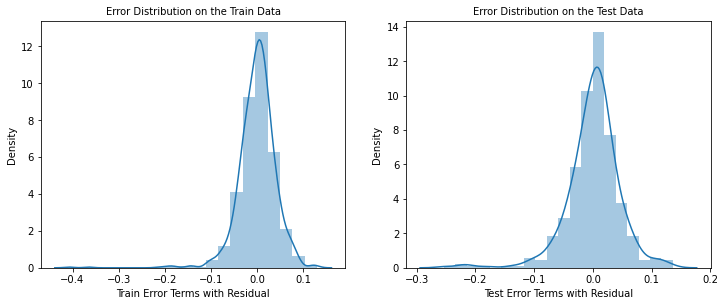

In [184]:
plt.figure(figsize=(12,10))

#Train Data Plot
plt.subplot(2,2,1)
residual_train = y_train - y_train_pred
sns.distplot(residual_train, bins=20)
plt.title("Error Distribution on the Train Data", fontdict={'fontsize': 10})
plt.xlabel("Train Error Terms with Residual")

#Test Data Plot
plt.subplot(2,2,2)
residual_test = y_test - y_test_pred
sns.distplot(residual_test, bins=20)
plt.title("Error Distribution on the Test Data", fontdict={'fontsize': 10})
plt.xlabel("Test Error Terms with Residual")

plt.show()

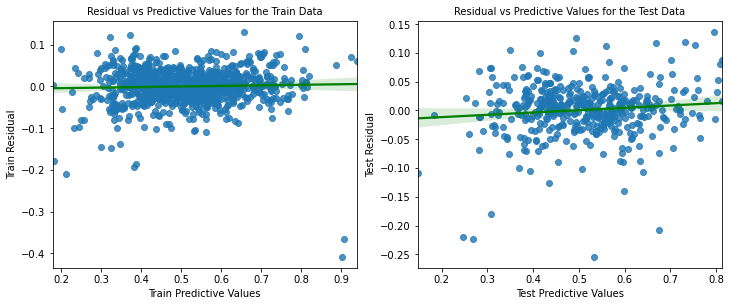

In [185]:
plt.figure(figsize=(12,10))
#Train Data
plt.subplot(2,2,1)
sns.regplot(x=y_train_pred,y=residual_train, line_kws={"color": "green"})
plt.title("Residual vs Predictive Values for the Train Data", fontdict={'fontsize':10})
plt.xlabel("Train Predictive Values")
plt.ylabel("Train Residual")

#Test Data
plt.subplot(2,2,2)
sns.regplot(x=y_test_pred,y=residual_test, line_kws={"color": "green"})
plt.title("Residual vs Predictive Values for the Test Data", fontdict={'fontsize':10})
plt.xlabel("Test Predictive Values")
plt.ylabel("Test Residual")
plt.show()

#### There is no significant difference in patterns between residual and predicted values, shows its good model `

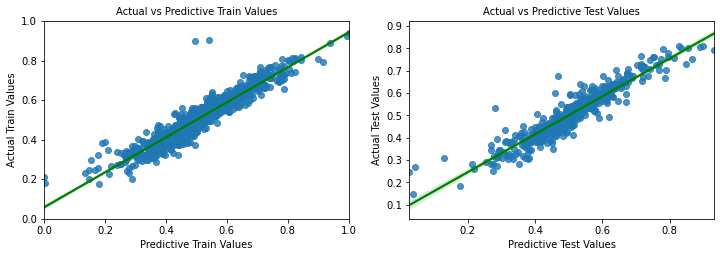

In [186]:
plt.figure(figsize=(12,8))

#Train Data
plt.subplot(2,2,1)
sns.regplot(x=y_train,y=y_train_pred, line_kws={"color": "green"})
plt.title("Actual vs Predictive Train Values", fontdict={'fontsize':10})
plt.xlabel("Predictive Train Values")
plt.ylabel("Actual Train Values")

#Test Data
plt.subplot(2,2,2)
sns.regplot(x=y_test,y=y_test_pred, line_kws={"color": "green"})
plt.title("Actual vs Predictive Test Values", fontdict={'fontsize':10})
plt.xlabel("Predictive Test Values")
plt.ylabel("Actual Test Values")

plt.show()

In [ ]:
## Conclusion:

- Residual analysis for both test and train data seems to fit the assumptions of the Linear Regression.
- Residuals have mean of zero, closely normally distributed.
- Residuals do not have any pattern, so it has homoscedasticity.

### TOP 10 variables significant in predicting the Sale Prices are : .
- **GrLivArea:** Above grade (ground) living area square feet.
- **OverallQual:** Rates the overall material and finish of the house.
- **MSZoning_RL:** Identifies residential with Low Density zone. 
- **MSZoning_RH:** Identifies residential with High Density zone. 
- **OverallCond:** Rates the overall condition of the house.
- **GarageCars:** Size of garage in car capacity.
- **LotArea:** Lot size in square feet
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **MSZoning_RM:** Identifies residential with Medium Density zone.
- **MSZoning_FV:** Identifies residential with Floating Village Residential

#### Ridge Regression
   - R2 score(Train): 90.05%
   - R2 score(Test): 87.86%
        
#### Lasso Regression
   - R2 score(Train): 89.88%
   - R2 score(Test): 88.20%

Optimal value of alpha for Ridge and Lasso Regression is below:

- **Alpha value for Ridge Regression:** <font color="blue">1</font>
        
- **Alpha value for Lasso Regression:** <font color="blue">0.0001</font>


 # End of Part I of the Assignment



## <font color = blue>Problem Statement - Part II  <font>

### Question 1) What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Answer 1: 


#### Optimal value of alpha for Ridge and Lasso Regression is below:

#### Alpha value for Ridge Regression:1
        
#### Alpha value for Lasso Regression:0.0001

In [196]:
#Fitting Ridge model for alpha = 2 , printing penalised coefficients  
alpha_2 = 2
ridge_2 = Ridge(alpha=alpha_2)

ridge_2.fit(X_train_new, y_train)

Ridge(alpha=2)

In [197]:
y_train_pred = ridge_2.predict(X_train_new)
y_test_pred = ridge_2.predict(X_test_new)

print("Data after Ridge Regression Alpha Value = 2")
score2 = calculate_score(y_train, y_train_pred, y_test, y_test_pred)


Data after Ridge Regression Alpha Value = 2
Train R2 score is :  0.896372966787371
Test R2 score is :  0.8742641544834933
Train RSS score is:  1.7592382043313866
Test RSS score is:  0.962602085137808
Train MSE score is:  0.0017230540688848055
Test MSE score is:  0.002192715455894779
Train RMSE score is:  0.04150968644647663
Test RMSE score is:  0.04682643970979194


#### Train R2 score changed little bit from 90.05%  to `89.70`% and Test R2 score changed from 87.86% to `87.11`.

In [199]:
#Top 10 feature of the Ridge Regression

ridge_param_df_2 = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient_2':ridge_2.coef_})
(ridge_param_df_2.sort_values('Coeficient_2', ascending=False)).head(10)

Features  Coeficient_2
9      GrLivArea          0.22
3    OverallQual          0.17
16    GarageCars          0.08
4    OverallCond          0.08
21   MSZoning_RL          0.08
12  BedroomAbvGr          0.08
20   MSZoning_RH          0.07
19   MSZoning_FV          0.06
2        LotArea          0.06
11      FullBath          0.06

In [200]:
####  Increasing the Alpha value of Lasso Regression from 0.0001 to 0.0002 
alpha_0002 = 0.0002
lasso_0002 = Lasso(alpha=alpha_0002)

lasso_0002.fit(X_train_new, y_train)

Lasso(alpha=0.0002)

In [201]:
y_train_pred = lasso_0002.predict(X_train_new)
y_test_pred = lasso_0002.predict(X_test_new)

print("Data after Lasso Regression with Value = 0.0002")
score5 = calculate_score(y_train, y_train_pred, y_test, y_test_pred)


Data after Lasso Regression with Value = 0.0002
Train R2 score is :  0.8899325872799109
Test R2 score is :  0.8756694423589821
Train RSS score is:  1.8685741693654232
Test RSS score is:  0.9518435537611142
Train MSE score is:  0.0018301412040797485
Test MSE score is:  0.0021682085507086883
Train RMSE score is:  0.04278014965003919
Test RMSE score is:  0.046564026358431335


#### Train R2 score changed little bit from 89.88%  to `89.05`% and Test R2 score also changed from 88.20% to `87.65`.

In [202]:
#Top 10 feature of the Lasso Regression

lasso_param_df_0002 = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient_0002':lasso_0002.coef_})
(lasso_param_df_0002.sort_values('Coeficient_0002', ascending=False)).head(10)

Features  Coeficient_0002
9              GrLivArea             0.30
3            OverallQual             0.20
16            GarageCars             0.08
4            OverallCond             0.07
10          BsmtFullBath             0.05
11              FullBath             0.04
26  Neighborhood_Crawfor             0.04
30  Neighborhood_NridgHt             0.04
21           MSZoning_RL             0.04
12          BedroomAbvGr             0.04

In [203]:
mt_table_2 = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                          'RMSE (Train)','RMSE (Test)'], 
              'Ridge Regression_1': score2, 
              'Lasso Regression_0.0001': score3, 
              'Ridge Regression_2': score2, 
              'Lasso Regression_0.0002': score5, 
            }

final_metric_2 = pd.DataFrame(mt_table_2 ,columns = ['Metrics', 'Ridge Regression_1', 'Lasso Regression_0.0001', 'Ridge Regression_2', 'Lasso Regression_0.0002'] )

final_metric_2

Metrics  Ridge Regression_1  Lasso Regression_0.0001  \
0  R2 Score (Train)            8.96e-01                 8.98e-01   
1   R2 Score (Test)            8.74e-01                 8.81e-01   
2       RSS (Train)            1.76e+00                 1.73e+00   
3        RSS (Test)            9.63e-01                 9.11e-01   
4       MSE (Train)            1.72e-03                 1.69e-03   
5        MSE (Test)            2.19e-03                 2.07e-03   
6      RMSE (Train)            4.15e-02                 4.11e-02   
7       RMSE (Test)            4.68e-02                 4.55e-02   

   Ridge Regression_2  Lasso Regression_0.0002  
0            8.96e-01                 8.90e-01  
1            8.74e-01                 8.76e-01  
2            1.76e+00                 1.87e+00  
3            9.63e-01                 9.52e-01  
4            1.72e-03                 1.83e-03  
5            2.19e-03                 2.17e-03  
6            4.15e-02                 4.28e-02  
7            4.68e-02                 4.66e-02

#### There is a minor reduction in both train and test R2 when we double the value of alpha

In [205]:
#Checking the changes in the co-efficient after the regularization
beta_2 = pd.DataFrame(index=X_train_new.columns)

In [206]:
beta_2.rows = X_train_new.columns

In [207]:
beta_2['Ridge_2'] = ridge_2.coef_
beta_2['Lasso_0002'] = lasso_0002.coef_

In [208]:
pd.set_option('display.max_rows', None)
beta_2.head(50)

Ridge_2  Lasso_0002
MSSubClass            -3.55e-02   -3.32e-02
LotFrontage           -2.51e-02   -0.00e+00
LotArea                6.11e-02    5.56e-03
OverallQual            1.73e-01    2.03e-01
OverallCond            7.58e-02    7.25e-02
BsmtQual               5.41e-02    3.42e-02
BsmtExposure           2.83e-02    2.71e-02
BsmtFinType1           2.32e-02    2.49e-02
BsmtFinSF1             1.28e-02    0.00e+00
GrLivArea              2.18e-01    2.98e-01
BsmtFullBath           4.56e-02    4.72e-02
FullBath               5.75e-02    4.21e-02
BedroomAbvGr           7.50e-02    3.52e-02
KitchenQual            3.25e-02    2.41e-02
FireplaceQu            3.50e-02    3.03e-02
GarageFinish           2.67e-02    2.42e-02
GarageCars             7.77e-02    7.90e-02
WoodDeckSF             2.68e-02    2.06e-02
HouseOld              -3.08e-02   -3.17e-02
MSZoning_FV            6.21e-02    2.01e-02
MSZoning_RH            6.61e-02    1.81e-02
MSZoning_RL            7.50e-02    3.63e-02
MSZoning_RM            4.68e-02    0.00e+00
LotConfig_FR2         -1.80e-02   -6.13e-03
LotConfig_FR3         -1.12e-02   -0.00e+00
Neighborhood_ClearCr   3.94e-02    3.37e-02
Neighborhood_Crawfor   4.96e-02    3.91e-02
Neighborhood_Edwards  -2.25e-02   -2.30e-02
Neighborhood_MeadowV  -2.31e-02   -0.00e+00
Neighborhood_NoRidge   4.98e-02    3.34e-02
Neighborhood_NridgHt   4.50e-02    3.63e-02
Neighborhood_Somerst   3.81e-02    3.37e-02
Neighborhood_StoneBr   3.78e-02    1.79e-02
Neighborhood_Veenker   3.51e-02    1.80e-02
BldgType_Twnhs        -1.52e-02   -9.62e-03
HouseStyle_2.5Fin     -3.73e-03   -0.00e+00
Exterior1st_AsphShn    6.95e-03    0.00e+00
Exterior1st_BrkComm   -3.59e-02   -0.00e+00
Exterior1st_BrkFace    2.83e-02    2.68e-02
Exterior1st_CBlock    -9.06e-03   -0.00e+00
Exterior2nd_CBlock    -9.06e-03   -0.00e+00
Exterior2nd_Stucco    -2.58e-02   -2.45e-02
Exterior2nd_Wd Shng   -2.81e-02   -2.14e-02
Foundation_CBlock      1.60e-02    8.28e-03
Foundation_PConc       2.19e-02    1.58e-02
Foundation_Slab        3.04e-02    4.27e-03
Foundation_Stone       2.97e-02    0.00e+00
Foundation_Wood        2.92e-02    0.00e+00
SaleCondition_AdjLand  2.93e-03   -0.00e+00
SaleCondition_Partial  9.61e-03    8.14e-03

#### Below are the TOP 10 variables which are important in predicting the Sale Prices after doubling the ALPHA values.

- **GrLivArea:** Above grade (ground) living area square feet.
- **OverallQual:** Rates the overall material and finish of the house.
- **GarageCars:** Size of garage in car capacity.
- **OverallCond:** Rates the overall condition of the house.
- **FullBath:** Full bathrooms above grade
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **MSZoning_RL:** Identifies residential with Low Density zone. 
- **Neighborhood_NridgHt:** hysical locations within Ames city limits Northridge Heights
- **BsmtFullBath:** Basement full bathrooms
- **Neighborhood_Crawfor:** Physical locations within Ames city limits is Crawford.

#### Question 2) You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

#### Answer 2:

#### R2 Score of `Lasso is better than Ridge` for Test Data, so we will prefer to go for Lasso regression.
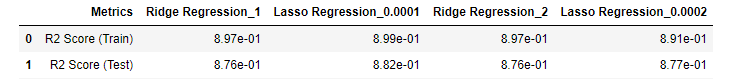

#### Question 3) After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


#### Answer 3:


#### Below are the TOP 5 variables which are significant in predicting the Sale Price.

- **GrLivArea:** Above grade (ground) living area square feet.
- **OverallQual:** Rates the overall material and finish of the house.
- **GarageCars:** Size of garage in car capacity.
- **OverallCond:** Rates the overall condition of the house.
- **BsmtFullBath:** Basement full bathrooms

#### So  removing those and  rebuilding the model using Lasso Regression.

In [216]:
#drop Top 5 column list 
drop_top5 = ['GrLivArea', 'OverallQual', 'GarageCars', 'OverallCond', 'BsmtFullBath']

In [217]:
#Displaying the previous list of columns
print("Train Data Columns:\n")
print(X_train_new.columns)
print("\n\nTest Data Columns:\n")
print(X_test_new.columns)

print("\n\nShape of Train Data Set: ", X_train_new.shape)
print("\n\nShape of Test Data Set: ", X_test_new.shape)

Train Data Columns:

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'WoodDeckSF', 'HouseOld',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_CBlock',
       'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'Sal

In [218]:
# Dropping "drop_top5" from X_train_new.columns and X_test_new.columns
X_train_new_2 = X_train_new.drop(drop_top5, axis=1)
X_test_new_2 = X_test_new.drop(drop_top5, axis=1)

print("\n The shape of the Train Data Set after removing columns: ", X_train_new_2.shape)
print("\nThe shape of the Test Data Set after removing columns: ", X_test_new_2.shape)


 The shape of the Train Data Set after removing columns:  (1021, 45)

The shape of the Test Data Set after removing columns:  (439, 45)


## Building the lasso regression after dropping top 5 vairables from previous model

In [219]:
#Fitting the lasso model for alpha = 0.0001 after droping the variable and fetching the penalized coefocoent 
alpha_drop = 0.0001
lasso_drop = Lasso(alpha=alpha_drop)

lasso_drop.fit(X_train_new_2, y_train)

Lasso(alpha=0.0001)

In [220]:
y_train_pred = lasso_drop.predict(X_train_new_2)
y_test_pred = lasso_drop.predict(X_test_new_2)

print("Post removal of top 5 variables, data with the Lasso Regression with value = 0.0001")
score6 = calculate_score(y_train, y_train_pred, y_test, y_test_pred)


Post removal of top 5 variables, data with the Lasso Regression with value = 0.0001
Train R2 score is :  0.8409661889548968
Test R2 score is :  0.7995325721970561
Train RSS score is:  2.6998587868176855
Test RSS score is:  1.5347283283667381
Train MSE score is:  0.0026443279008988105
Test MSE score is:  0.0034959643015187655
Train RMSE score is:  0.051423028896583005
Test RMSE score is:  0.05912668011582221


### Train R2 score reduces` drastically bit from `89.88%`  to `84.20%` and `Test R2 score also reduces` from `88.20%` to `80.22%` after removal of Top 5 predictive variables

In [221]:
#Top 10 feature with Lasso Regression

lasso_param_df_drop = pd.DataFrame({'Features':X_train_new_2.columns, 'Coeficient_drop':lasso_drop.coef_})
(lasso_param_df_drop.sort_values('Coeficient_drop', ascending=False)).head(10)

Features  Coeficient_drop
8           BedroomAbvGr             0.18
2                LotArea             0.14
16           MSZoning_RL             0.11
7               FullBath             0.11
6             BsmtFinSF1             0.10
14           MSZoning_FV             0.10
15           MSZoning_RH             0.10
3               BsmtQual             0.10
24  Neighborhood_NoRidge             0.09
17           MSZoning_RM             0.09

In [223]:

mt_table_3 = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                          'RMSE (Train)','RMSE (Test)'], 
              'Lasso Regression_0.0001': score3, 
              'Lasso Regression_drop_0.0001': score6, 
             }

final_metric_3 = pd.DataFrame(mt_table_3 ,columns = ['Metrics', 'Lasso Regression_0.0001', 'Lasso Regression_drop_0.0001'] )

final_metric_3

Metrics  Lasso Regression_0.0001  Lasso Regression_drop_0.0001
0  R2 Score (Train)                 8.98e-01                      8.41e-01
1   R2 Score (Test)                 8.81e-01                      8.00e-01
2       RSS (Train)                 1.73e+00                      2.70e+00
3        RSS (Test)                 9.11e-01                      1.53e+00
4       MSE (Train)                 1.69e-03                      2.64e-03
5        MSE (Test)                 2.07e-03                      3.50e-03
6      RMSE (Train)                 4.11e-02                      5.14e-02
7       RMSE (Test)                 4.55e-02                      5.91e-02

### Both Train and Test R2 score significantly decreased in Lasso Regression, after removal of top 5 predictive variables

### Below are the TOP 5 variables which are important in predicting the Sale Prices after the removing of the 5 predictive variables from previous model..**
 
### - BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
### - LotArea: Lot size in square feet
### - MSZoning_RL: Identifies residential with Low Density zone. 
### - FullBath: Full bathrooms above grade
### - BsmtFinSF1: Type 1 finished square feet
 

## Question 4) How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

### Answer 4: 

### Below are the pointers I conclude from the course module:

### Robust refers to the model works for a broad range of inputs. If the model gets really good results at training time (which may  seem to be “more accurate”) but will not generalize to out-of-sample data (i.e. not robust actually) then it is termed as overfitting. 

### The model should be generalized such that the test accuracy is not lesser than the training score.

### In our case, based on all the data modelling both the Ridge and the Lasso performed good on the Train and the Test Data which shows our model with Alpha value "1" for Ridge and "0.0001" for Lasso is Robust and more Generalized model.

    - Simpler models are more generic
    - Simpler model requires fewer training samples
    - Simpler model are more robust

### Too much importance should not given to the outliers such that the accuracy predicted by the model turns out to be high. But outliers analysis is needed , only those which are relevant to the dataset need to be retained and the rest should be dropped.

### If the accuracy of the Train and the Test are same that shows the model is overfitted and it learnt all the Train and the Test data  model is not robust and generalized. It will significantly fail and will not work on broad range of unseen data.


 #### End of the Part II of the Assignment



In [230]:
pwd


'/Users/nehapurohit'